# **Capstone Project: Exploratory Data Analysis and Predictive Modeling for Candidate Joining Prediction**

## **Project Overview**

### **Title**: Exploratory Data Analysis and Predictive Modeling for Candidate Joining Prediction in Talent Acquisition

### **Objective**:
##  **To predict whether candidates will join after accepting job offers using data analysis and machine learning techniques.**


# ***Let's Begin !***

## ***Know Your Data***

# **Loading Dataset and Importing Modules**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, HTML
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import zscore

In [2]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [3]:
os.chdir(r'C:\Users\ramna\Desktop\PROJECT AI ML\OfferTillOnboard')

In [4]:
# Load the datasets
hr_df = pd.read_csv(r'data/HR_Hiring_details_transaction.csv')
interview_dates = pd.read_excel(r'data/Interview_Dates.xlsx')
joining_status = pd.read_csv(r'data/joining_Status.csv')
lob_master = pd.read_csv(r'data/LOB_Master.csv')
location_master = pd.read_excel(r'data/Location_Master.xlsx')
postal_code_master = pd.read_excel(r'data/Postal_Code_Master.xlsx')
region_location_mapping = pd.read_excel(r'data/Region_Location_Mapping.xlsx')
region_master = pd.read_excel(r'data/Region_Master.xlsx')
domicile_master = pd.read_excel(r'data/Domicile_Master.xlsx')

# **Merging CSV and Excel Files for Data Preparation**

In [5]:
# Merge HR data with joining status
hr_df = pd.merge(hr_df, joining_status, on='Candidate_Ref', how='left')

# Merge HR data with interview dates
hr_df = pd.merge(hr_df, interview_dates, on='Candidate_Ref', how='left')

# Merge HR data with LOB Master
hr_df = pd.merge(hr_df, lob_master, left_on='LOB_Id', right_on='LOB_Id', how='left')

# Merge HR data with Postal Code Master
hr_df = pd.merge(hr_df, postal_code_master, on='Postal_Code', how='left', suffixes=('', '_postal'))

# Merge HR data with Location Master
hr_df = pd.merge(hr_df, location_master, left_on='Location_ID', right_on='Location_ID', how='left', suffixes=('', '_location'))

# Merge HR data with Region Location Mapping and Region Master
hr_df = pd.merge(hr_df, region_location_mapping, on='Location_ID', how='left', suffixes=('', '_region_mapping'))
hr_df = pd.merge(hr_df, region_master, on='Region_ID', how='left', suffixes=('', '_region'))

# Merge HR data with Domicile Master
hr_df = pd.merge(hr_df, domicile_master, left_on='Domicile_Id', right_on='Domicile_ID', how='left', suffixes=('', '_domicile'))

# Removing Duplicate Columns

### After merging datasets, duplicate columns need to be removed for a clean dataset.

In [6]:
# Display the merged dataset

display(HTML(hr_df.head(2).to_html()))

In [7]:
# Drop the redundant Location_ID_postal,Domicile_Id column
hr_df.drop(columns=['Location_ID_postal','Domicile_ID'], inplace=True)
merged_hr_removed_duplicates_data = hr_df

# **Understand More About The Data**

### Dataset First View

In [8]:
display(HTML(merged_hr_removed_duplicates_data.head().to_html()))

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(merged_hr_removed_duplicates_data.shape)

(8995, 26)


In [10]:
#Getting all the columns
print("Features of the dataset:")
merged_hr_removed_duplicates_data.columns

Features of the dataset:


Index(['Sno', 'Candidate_Ref', 'DOJ_Extended', 'Duration_to_accept_offer',
       'Notice_Period', 'Offered_Band', 'Percent_hike_expected_in_CTC',
       'Percent_hike_offered_in_CTC', 'Percent_difference_CTC',
       'Joining_Bonus', 'Candidate_relocate_actual', 'Gender',
       'Candidate_Source', 'Rex_in_Yrs', 'Location_ID', 'Postal_Code', 'Age',
       'LOB_Id', 'Domicile_Id', 'Status', 'Date_of_Interview', 'LOB',
       'Location', 'Region_ID', 'Region_Name', 'Domicile_Name'],
      dtype='object')

## Dataset Information

In [11]:
#check details about the data set
merged_hr_removed_duplicates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sno                           8995 non-null   int64         
 1   Candidate_Ref                 8995 non-null   int64         
 2   DOJ_Extended                  8995 non-null   object        
 3   Duration_to_accept_offer      8995 non-null   int64         
 4   Notice_Period                 8995 non-null   int64         
 5   Offered_Band                  8982 non-null   object        
 6   Percent_hike_expected_in_CTC  8995 non-null   float64       
 7   Percent_hike_offered_in_CTC   8995 non-null   float64       
 8   Percent_difference_CTC        8995 non-null   float64       
 9   Joining_Bonus                 8995 non-null   object        
 10  Candidate_relocate_actual     8995 non-null   object        
 11  Gender                        

## Duplicate Values

In [12]:
# Checking for duplicate rows in the DataFrame
duplicate_count = merged_hr_removed_duplicates_data.duplicated().sum()
total_rows = len(merged_hr_removed_duplicates_data)

print(f"Total number of rows: {total_rows}")
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Is the data duplicated? {'Yes' if duplicate_count > 0 else 'No'}")
print(f"Number of unique rows: {total_rows - duplicate_count}")

Total number of rows: 8995
Number of duplicate rows: 0
Is the data duplicated? No
Number of unique rows: 8995


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

for i in merged_hr_removed_duplicates_data.columns.tolist():
  print(f"No. of unique values in {i} is {merged_hr_removed_duplicates_data[i].nunique()}.")

No. of unique values in Sno is 8995.
No. of unique values in Candidate_Ref is 8995.
No. of unique values in DOJ_Extended is 2.
No. of unique values in Duration_to_accept_offer is 136.
No. of unique values in Notice_Period is 7.
No. of unique values in Offered_Band is 4.
No. of unique values in Percent_hike_expected_in_CTC is 2082.
No. of unique values in Percent_hike_offered_in_CTC is 2601.
No. of unique values in Percent_difference_CTC is 1148.
No. of unique values in Joining_Bonus is 2.
No. of unique values in Candidate_relocate_actual is 2.
No. of unique values in Gender is 2.
No. of unique values in Candidate_Source is 3.
No. of unique values in Rex_in_Yrs is 22.
No. of unique values in Location_ID is 11.
No. of unique values in Postal_Code is 15.
No. of unique values in Age is 33.
No. of unique values in LOB_Id is 9.
No. of unique values in Domicile_Id is 24.
No. of unique values in Status is 2.
No. of unique values in Date_of_Interview is 499.
No. of unique values in LOB is 9.
No

## Missing Values / Null values

In [14]:
print(merged_hr_removed_duplicates_data.isnull().sum())

Sno                              0
Candidate_Ref                    0
DOJ_Extended                     0
Duration_to_accept_offer         0
Notice_Period                    0
Offered_Band                    13
Percent_hike_expected_in_CTC     0
Percent_hike_offered_in_CTC      0
Percent_difference_CTC           0
Joining_Bonus                    0
Candidate_relocate_actual        0
Gender                           0
Candidate_Source                 0
Rex_in_Yrs                       0
Location_ID                      0
Postal_Code                      0
Age                             15
LOB_Id                           0
Domicile_Id                      0
Status                           0
Date_of_Interview                0
LOB                              0
Location                        13
Region_ID                       13
Region_Name                     13
Domicile_Name                    0
dtype: int64


In [15]:
# Duplicate rows check
print(merged_hr_removed_duplicates_data.duplicated().sum())

0


## Visualizing the missing values

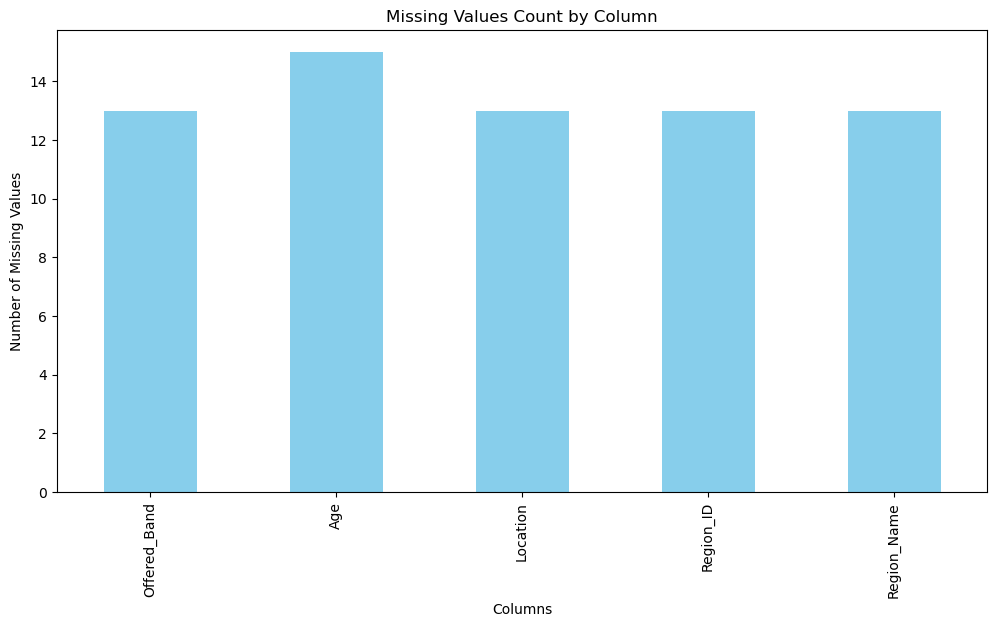

In [16]:
import matplotlib.pyplot as plt

# Calculating the number of missing values per column
missing_values_count = merged_hr_removed_duplicates_data.isnull().sum()

# Filtering columns with missing values
missing_values_count = missing_values_count[missing_values_count > 0]

# Plotting the bar plot
plt.figure(figsize=(12, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


# Data Quality Check Summary

* **Total Observations:** 8,995
* **Total Features:** 26

## Missing Values
* **Columns with Missing Values:**
  - `Offered_Band`: 13 missing (0.14%)
  - `Age`: 15 missing (0.17%)
  - `Location`: 13 missing (0.14%)
  - `Region_ID`: 13 missing (0.14%)
  - `Region_Name`: 13 missing (0.14%)

## Null Values
* **Columns with Null Values:**
  - `Location_ID_postal`: 1 null (0.01%)
  - `Domicile_ID`: 1 null (0.01%)

## Duplicate Values
* **Total Duplicate Rows:** 0 (No duplicates found)

## Data Type Issues
* **Date Columns:**
  - `Date_of_Interview` Convert to `datetime` data type for proper analysis.
* **Numeric Columns Stored as Objects:**
  - `Duration_to_accept_offer`, `Notice_Period`, `Percent_hike_expected_in_CTC`, `Percent_hike_offered_in_CTC`, `Percent_difference_CTC`, `Rex_in_Yrs`, `Age`: Convert to appropriate numeric data types (`int` or `float`).
* **Categorical Columns Stored as Objects:**
  - `Joining_Bonus`, `Candidate_relocate_actual`, `Gender`, `Candidate_Source`, `Offered_Band`, `Location_ID`, `LOB_Id`, `Domicile_Id`, `Status`, `LOB`, `Location`, `Region_ID`, `Region_Name`, `Domicile_Name`: Convert to `category` data type for optimized memory usage and analysis.
  


In [17]:
# Display rows with any missing values
rows_with_missing = merged_hr_removed_duplicates_data[merged_hr_removed_duplicates_data.isnull().any(axis=1)]

# Display the number of rows with missing values
num_rows_with_missing = rows_with_missing.shape[0]
print(f"Number of rows with missing values: {num_rows_with_missing}")

display(HTML(rows_with_missing.to_html()))

Number of rows with missing values: 40


# Missing Values Handling 

* **Total Observations:** 8,995
* **Total Features:** 26

## Missing Values Summary
* **Total Rows with Missing Values:** 40 (0.45% of total rows)

## Planned Action
* **Rows with Missing Values:** 40 rows will be dropped from the dataset.
* **Reasoning:** The percentage of rows with missing values is minimal, which will allow for their removal without significantly impacting the dataset’s quality.

In [18]:
# Drop rows with any missing values
hr_data_clean = merged_hr_removed_duplicates_data.dropna()

# Display the updated DataFrame to verify changes
print(hr_data_clean.isnull().sum())  # This will confirm if all missing values have been removed

# Display the number of rows remaining after dropping
print(f"Number of rows after removing missing values: {hr_data_clean.shape[0]}")

Sno                             0
Candidate_Ref                   0
DOJ_Extended                    0
Duration_to_accept_offer        0
Notice_Period                   0
Offered_Band                    0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Joining_Bonus                   0
Candidate_relocate_actual       0
Gender                          0
Candidate_Source                0
Rex_in_Yrs                      0
Location_ID                     0
Postal_Code                     0
Age                             0
LOB_Id                          0
Domicile_Id                     0
Status                          0
Date_of_Interview               0
LOB                             0
Location                        0
Region_ID                       0
Region_Name                     0
Domicile_Name                   0
dtype: int64
Number of rows after removing missing values: 8955


## Final Dataset (Post-Cleanup)

* **Rows After Cleaning:** 8,955
* **Features:** 26

## ***Understanding Your Variables***

In [19]:
# Dataset Columns
print(f'Features: {hr_data_clean.columns.to_list()}')

Features: ['Sno', 'Candidate_Ref', 'DOJ_Extended', 'Duration_to_accept_offer', 'Notice_Period', 'Offered_Band', 'Percent_hike_expected_in_CTC', 'Percent_hike_offered_in_CTC', 'Percent_difference_CTC', 'Joining_Bonus', 'Candidate_relocate_actual', 'Gender', 'Candidate_Source', 'Rex_in_Yrs', 'Location_ID', 'Postal_Code', 'Age', 'LOB_Id', 'Domicile_Id', 'Status', 'Date_of_Interview', 'LOB', 'Location', 'Region_ID', 'Region_Name', 'Domicile_Name']


In [20]:
# Get a description of the dataset, including all types of features
data_description = hr_data_clean.describe().T

print("Data Description:")
display(HTML(data_description.to_html()))

Data Description:


# **Preprocessing the dataset**

#### ***Missing Values/Null Values***

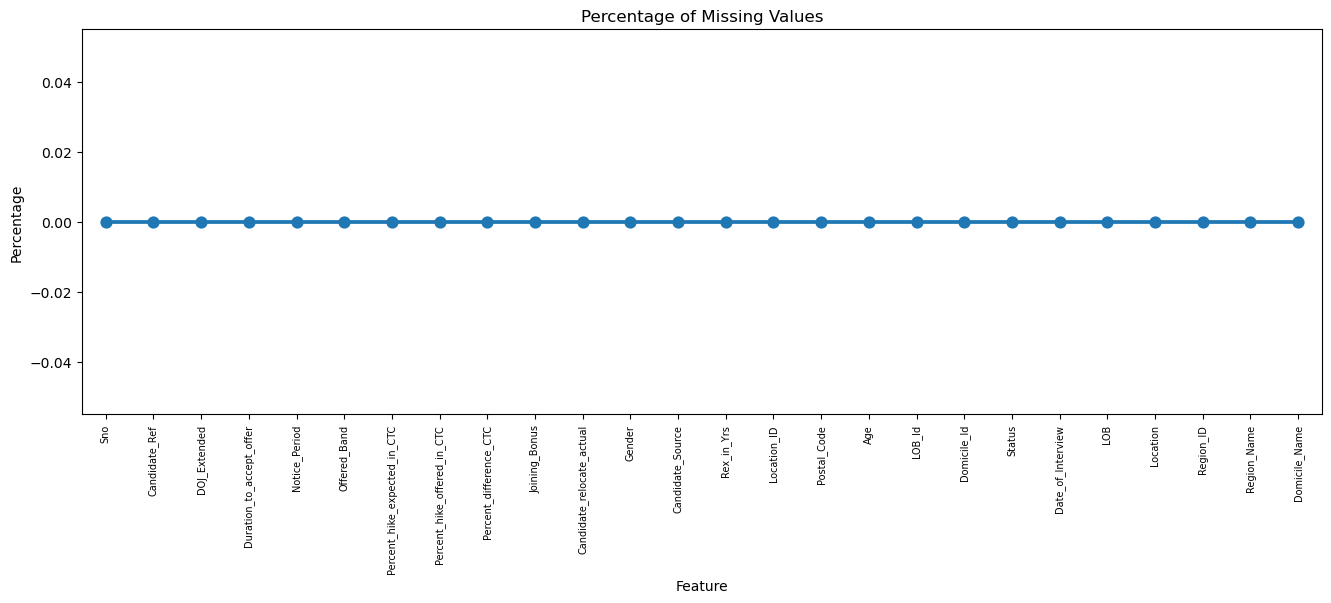

In [21]:
# Visualizing the missing values
# Calculate the percentage of missing values
missing = pd.DataFrame((hr_data_clean.isnull().sum() * 100) / hr_data_clean.shape[0]).reset_index()
missing.columns = ['Feature', 'Percentage']  # Rename columns for clarity

# Plotting
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Feature', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

* ***As we can see above there are no missing value present***

In [22]:
# Checking Duplicate Values
value=len(hr_data_clean[hr_data_clean.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [23]:
hr_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8955 entries, 0 to 8994
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sno                           8955 non-null   int64         
 1   Candidate_Ref                 8955 non-null   int64         
 2   DOJ_Extended                  8955 non-null   object        
 3   Duration_to_accept_offer      8955 non-null   int64         
 4   Notice_Period                 8955 non-null   int64         
 5   Offered_Band                  8955 non-null   object        
 6   Percent_hike_expected_in_CTC  8955 non-null   float64       
 7   Percent_hike_offered_in_CTC   8955 non-null   float64       
 8   Percent_difference_CTC        8955 non-null   float64       
 9   Joining_Bonus                 8955 non-null   object        
 10  Candidate_relocate_actual     8955 non-null   object        
 11  Gender                        8955 

### **Updated Breakdown of Our Features**

- **Sno:**  
  - *Description:* Serial number, auto-incremented.  
  - *Type:* `int64`  
  - *Action Required:* None  

- **Candidate_Ref:**  
  - *Description:* Unique reference number for each candidate.  
  - *Type:* `int64`  
  - *Action Required:* None  

- **DOJ_Extended:**  
  - *Description:* Indicates whether the Date of Joining is extended (`Yes`/`No`).  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Duration_to_accept_offer:**  
  - *Description:* Number of days taken by the candidate to accept the offer.  
  - *Type:* `int64`  
  - *Action Required:* None  

- **Notice_Period:**  
  - *Description:* Notice period with the previous employer, in days.  
  - *Type:* `int64`  
  - *Action Required:* None  

- **Offered_Band:**  
  - *Description:* Job band offered, e.g., E1, E2, E3.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Percent_hike_expected_in_CTC:**  
  - *Description:* Expected percentage hike in CTC by the candidate.  
  - *Type:* `float64`  
  - *Action Required:* None  

- **Percent_hike_offered_in_CTC:**  
  - *Description:* Percentage hike in CTC offered by the organization.  
  - *Type:* `float64`  
  - *Action Required:* None  

- **Percent_difference_CTC:**  
  - *Description:* Difference between expected and offered CTC in percentage.  
  - *Type:* `float64`  
  - *Action Required:* None  

- **Joining_Bonus:**  
  - *Description:* Bonus offered upon joining (`Yes`/`No`).  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Candidate_relocate_actual:**  
  - *Description:* Indicates whether relocation is required or not (`Yes`/`No`).  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Gender:**  
  - *Description:* Gender of the candidate.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Candidate_Source:**  
  - *Description:* Source through which the candidate applied or was reached.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Rex_in_Yrs:**  
  - *Description:* Years of experience.  
  - *Type:* `int64`  
  - *Action Required:* None  

- **Location_ID:**  
  - *Description:* Code for the current location of the organization.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Postal_Code:**  
  - *Description:* Postal code of the organization's area.  
  - *Type:* `int64`  
  - *Action Required:* None  

- **Age:**  
  - *Description:* Age of the candidate.  
  - *Type:* `float64`  
  - *Action Required:* None  

- **LOB_Id:**  
  - *Description:* Unique ID for the Line of Business (LOB).  
  - *Type:* `int64`  
  - *Action Required:* None  

- **Status:**  
  - *Description:* Status indicating if the candidate joined or not.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Date_of_Interview:**  
  - *Description:* Date on which the interview was conducted.  
  - *Type:* `datetime64[ns]`  
  - *Action Required:* None  

- **LOB:**  
  - *Description:* Line of business.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Location:**  
  - *Description:* Name of the location.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Region_ID:**  
  - *Description:* Code representing the region.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Region_Name:**  
  - *Description:* Name of the region.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Domicile_ID:**  
  - *Description:* Code for the home state of the candidate.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  

- **Domicile_Name:**  
  - *Description:* Name of the domicile or home state.  
  - *Type:* `object` (will be converted to `category`)  
  - *Action Required:* Convert to `category`  
t is in `float64`.
   - **`LOB_Id`**: Ensure it is in `int64`.
`.
vert from `object` to `int`.


In [24]:
display(HTML(hr_data_clean.head(2).to_html()))

In [25]:
import pandas as pd

# Convert 'Date_of_Interview' to datetime
hr_data_clean['Date_of_Interview'] = pd.to_datetime(hr_data_clean['Date_of_Interview'], errors='coerce')

# Convert specified columns to categorical data types
categorical_columns = [
    'DOJ_Extended', 'Offered_Band', 'Joining_Bonus', 'Candidate_relocate_actual',
    'Gender', 'Candidate_Source', 'Location_ID', 'Domicile_Id', 'Status',
    'LOB', 'Location', 'Region_ID', 'Region_Name', 'Domicile_Name'
]

for column in categorical_columns:
    hr_data_clean[column] = hr_data_clean[column].astype('category')

# Convert specified columns to numeric data types
numeric_columns = {
    'Sno': 'int',
    'Candidate_Ref': 'int',
    'Duration_to_accept_offer': 'int',
    'Notice_Period': 'int',
    'Percent_hike_expected_in_CTC': 'float',
    'Percent_hike_offered_in_CTC': 'float',
    'Percent_difference_CTC': 'float',
    'Rex_in_Yrs': 'int',
    'Postal_Code': 'int',
    'Age': 'float',
    'LOB_Id': 'int'
}

for column, dtype in numeric_columns.items():
    hr_data_clean[column] = pd.to_numeric(hr_data_clean[column], errors='coerce').astype(dtype)

C:\Users\ramna\AppData\Local\Temp\ipykernel_14356\312385165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data_clean['Date_of_Interview'] = pd.to_datetime(hr_data_clean['Date_of_Interview'], errors='coerce')
C:\Users\ramna\AppData\Local\Temp\ipykernel_14356\312385165.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data_clean[column] = hr_data_clean[column].astype('category')
C:\Users\ramna\AppData\Local\Temp\ipykernel_14356\312385165.py:14: SettingWithCopyWarning: 
A value is trying to be s

In [26]:
# Final inspection to ensure all types are correct
print(hr_data_clean.info())


<class 'pandas.core.frame.DataFrame'>
Index: 8955 entries, 0 to 8994
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sno                           8955 non-null   int32         
 1   Candidate_Ref                 8955 non-null   int32         
 2   DOJ_Extended                  8955 non-null   category      
 3   Duration_to_accept_offer      8955 non-null   int32         
 4   Notice_Period                 8955 non-null   int32         
 5   Offered_Band                  8955 non-null   category      
 6   Percent_hike_expected_in_CTC  8955 non-null   float64       
 7   Percent_hike_offered_in_CTC   8955 non-null   float64       
 8   Percent_difference_CTC        8955 non-null   float64       
 9   Joining_Bonus                 8955 non-null   category      
 10  Candidate_relocate_actual     8955 non-null   category      
 11  Gender                        8955 

In [27]:
# Display the cleaned dataset

display(HTML(hr_data_clean.head().to_html()))

In [28]:
# Save the merged dataset to a new CSV file
hr_data_clean.to_csv('data/hr_data_clean.csv', index=False)

# **Exploratory Data Analysis Of The Data Set**

### Univariate Analysis

In [29]:
categorical_features = [
    'DOJ_Extended', 'Offered_Band', 'Joining_Bonus', 'Candidate_relocate_actual',
    'Gender', 'Candidate_Source', 'Location_ID', 'Domicile_Id', 'Status',
    'LOB', 'Location', 'Region_ID', 'Region_Name', 'Domicile_Name'
]

# Compute descriptive statistics
categorical_stats = hr_data_clean[categorical_features].describe().T
display(HTML(categorical_stats.head().to_html()))


### **Categorical Features Insights**

1. **DOJ_Extended:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Yes, No).
   - **Most Frequent (Top):** No.
   - **Frequency of Top Value:** 4,771.
   - **Insight:** A significant number of candidates did not extend their Date of Joining (DOJ). This could suggest a standard joining timeline for most candidates or that extensions are uncommon.

2. **Offered_Band:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 4 (E1, E2, E3, E4).
   - **Most Frequent (Top):** E1.
   - **Frequency of Top Value:** 5,546.
   - **Insight:** The majority of candidates were offered positions in the E1 band. This indicates that this band is the most common in the dataset, possibly reflecting the entry-level or most frequently hired roles.

3. **Joining_Bonus:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Yes, No).
   - **Most Frequent (Top):** Yes.
   - **Frequency of Top Value:** 8,539.
   - **Insight:** Most candidates received a joining bonus, suggesting that offering bonuses is a common practice for attracting new hires.

4. **Candidate_relocate_actual:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Yes, No).
   - **Most Frequent (Top):** No.
   - **Frequency of Top Value:** 7,671.
   - **Insight:** A large majority of candidates did not require relocation, which could imply that the company prefers or finds it easier to hire locally.

5. **Gender:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Male, Female).
   - **Most Frequent (Top):** Male.
   - **Frequency of Top Value:** 7,407.
   - **Insight:** There is a noticeable gender imbalance with males being more predominant. This suggests a potential area for exploring gender diversity and inclusion in hiring practices.

6. **Candidate_Source:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 3 (Direct, Referral, Agency).
   - **Most Frequent (Top):** Direct.
   - **Frequency of Top Value:** 4,784.
   - **Insight:** The majority of candidates were sourced directly, indicating a strong preference for or reliance on direct recruitment channels.

7. **Location_ID:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 10.
   - **Most Frequent (Top):** L002.
   - **Frequency of Top Value:** 3,146.
   - **Insight:** Location ID L002 is the most common, which may represent a major office or hiring location.

8. **Domicile_Id:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 24.
   - **Most Frequent (Top):** D8.
   - **Frequency of Top Value:** 399.
   - **Insight:** Domicile ID D8 is the most common, but the frequency is relatively low compared to the total, suggesting diverse representation from various domiciles.

9. **Status:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Joined, Not Joined).
   - **Most Frequent (Top):** Joined.
   - **Frequency of Top Value:** 7,277.
   - **Insight:** A high percentage of candidates (approximately 81.3%) joined after accepting the offer, indicating effective recruitment processes and high acceptance rates.

10. **LOB (Line of Business):**
    - **Count:** 8,955 entries.
    - **Unique Values:** 9 (e.g., INFRA, IT, Sales).
    - **Most Frequent (Top):** INFRA.
    - **Frequency of Top Value:** 2,820.
    - **Insight:** The 'INFRA' line of business is the most represented, suggesting it might be a primary focus area or have a higher hiring volume.

11. **Location:**
    - **Count:** 8,955 entries.
    - **Unique Values:** 10.
    - **Most Frequent (Top):** Chennai.
    - **Frequency of Top Value:** 3,146.
    - **Insight:** Chennai is the most common location for candidates, reflecting either a major hiring hub or strong company presence in this region.

12. **Region_ID:**
    - **Count:** 8,955 entries.
    - **Unique Values:** 4.
    - **Most Frequent (Top):** R2.
    - **Frequency of Top Value:** 5,718.
    - **Insight:** Region ID R2 has the highest frequency, indicating it is a significant region for hiring.

13. **Region_Name:**
    - **Count:** 8,955 entries.
    - **Unique Values:** 4 (e.g., North, South).
    - **Most Frequent (Top):** South.
    - **Frequency of Top Value:** 5,718.
    - **Insight:** The 'South' region is the most represented, aligning with the frequent location of Chennai, and suggesting a regional concentration in hiring.

14. **Domicile_Name:**
    - **Count:** 8,955 entries.
    - **Unique Values:** 24.
    - **Most Frequent (Top):** Haryana.
    - **Frequency of Top Value:** 399.
    - **Insight:** Haryana is the most common domicile, though the frequency is relatively small compared to the overall dataset, indicating a diverse range of domicile states.

### **Next Steps**
- Investigate reasons for gender imbalance and explore ways to enhance diversity.
- Examine why certain job bands (e.g., E1) are more prevalent and assess if this aligns with the company’s hiring strategy.
- Review the effectiveness of recruitment channels and consider expanding or optimizing them.
- Analyze regional hiring strategies to ensure alignment with business objectives and regional presence.


### 1. Correlation Analysis for Numerical Features

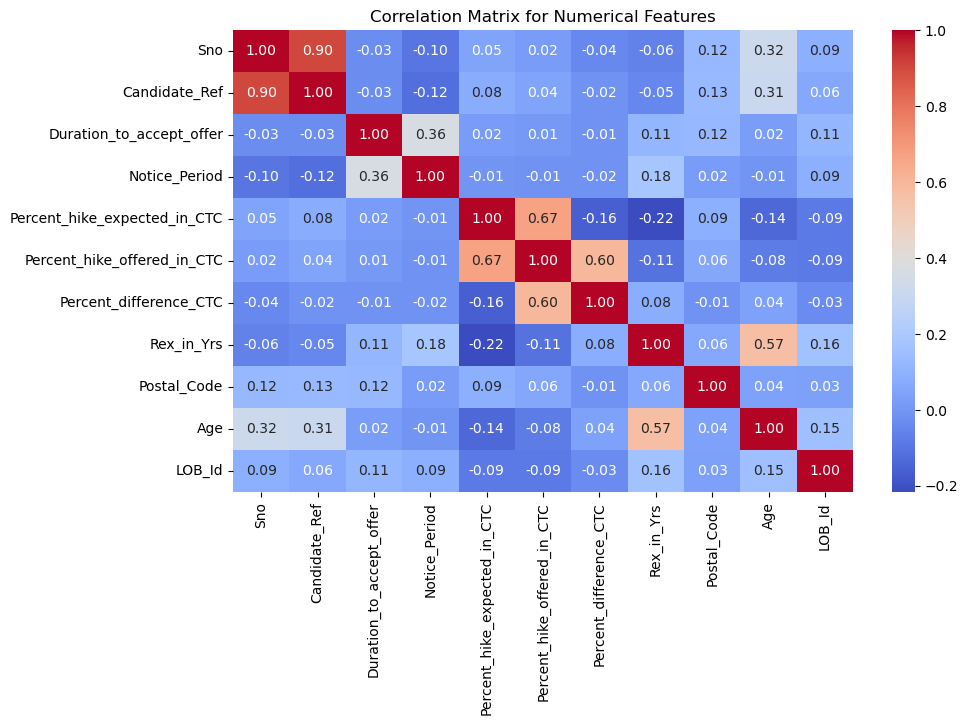

In [30]:

# Select only numerical columns for correlation analysis
numerical_data = hr_data_clean.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [31]:
print(hr_data_clean.dtypes)

Sno                                      int32
Candidate_Ref                            int32
DOJ_Extended                          category
Duration_to_accept_offer                 int32
Notice_Period                            int32
Offered_Band                          category
Percent_hike_expected_in_CTC           float64
Percent_hike_offered_in_CTC            float64
Percent_difference_CTC                 float64
Joining_Bonus                         category
Candidate_relocate_actual             category
Gender                                category
Candidate_Source                      category
Rex_in_Yrs                               int32
Location_ID                           category
Postal_Code                              int32
Age                                    float64
LOB_Id                                   int32
Domicile_Id                           category
Status                                category
Date_of_Interview               datetime64[ns]
LOB          

### 2. Comparison of Numerical Features by Status

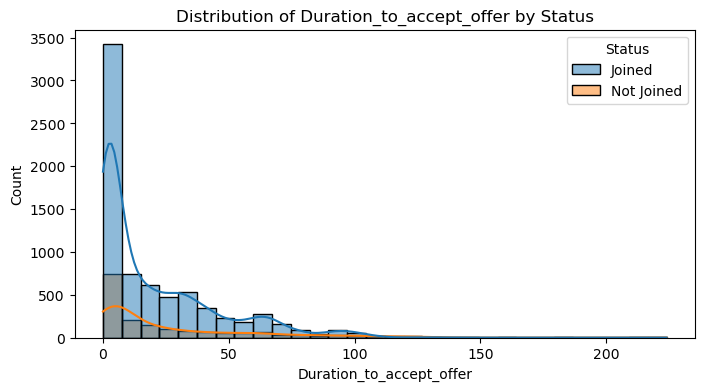

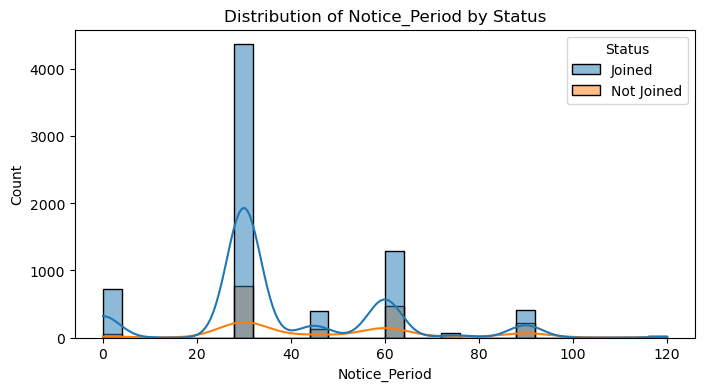

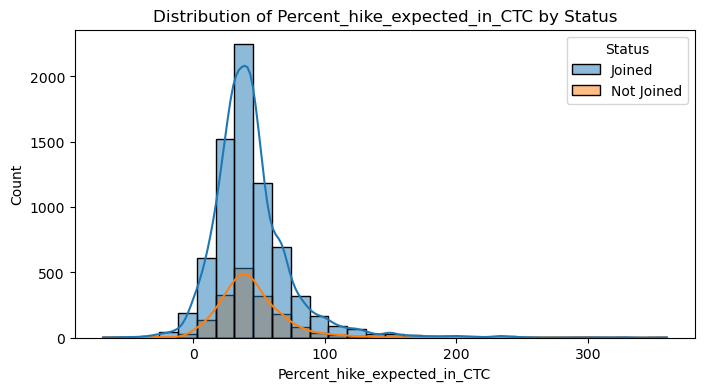

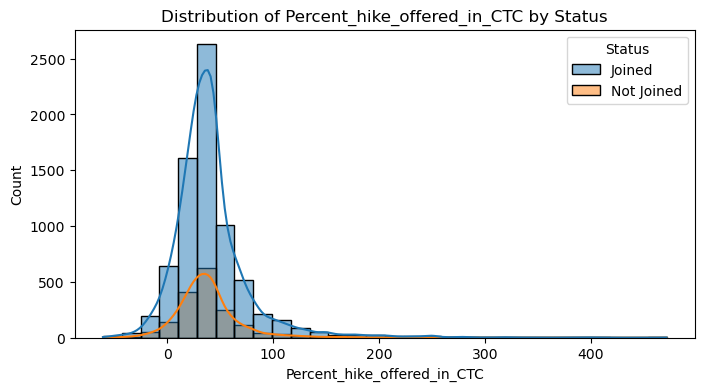

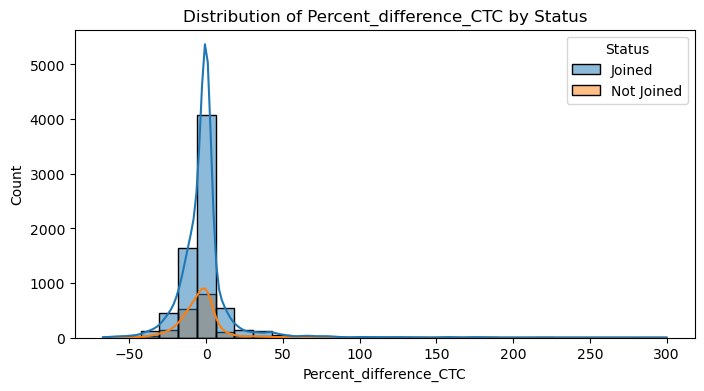

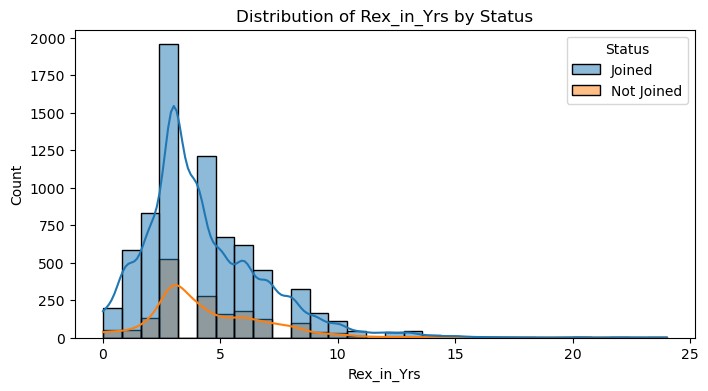

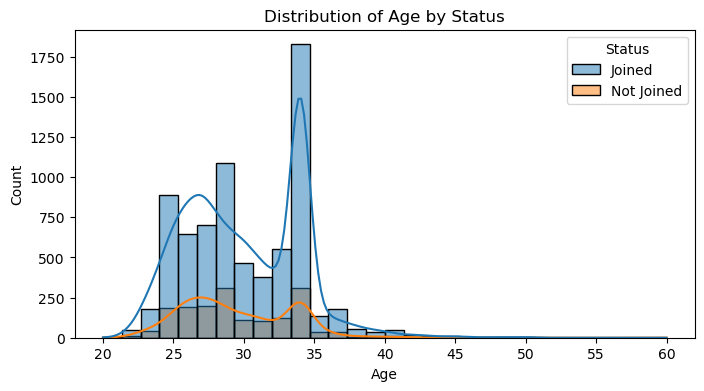

In [32]:

# Plotting histograms for numerical features
numerical_features = ['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC', 
                      'Percent_hike_offered_in_CTC', 'Percent_difference_CTC',
                      'Rex_in_Yrs', 'Age']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=hr_data_clean, x=feature, hue='Status', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Status')
    plt.show()

### 3. Categorical Feature Relationships

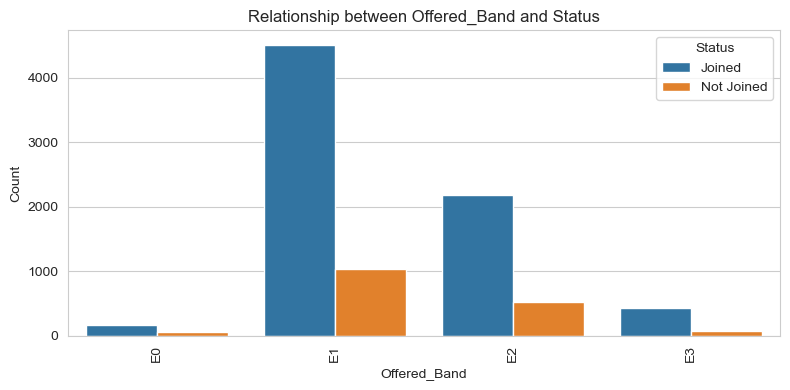

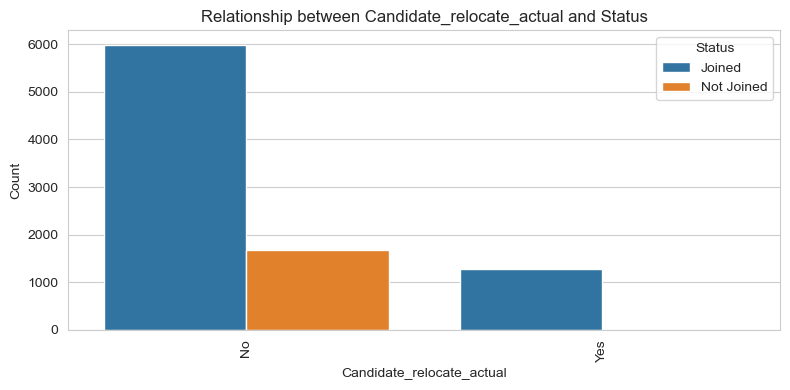

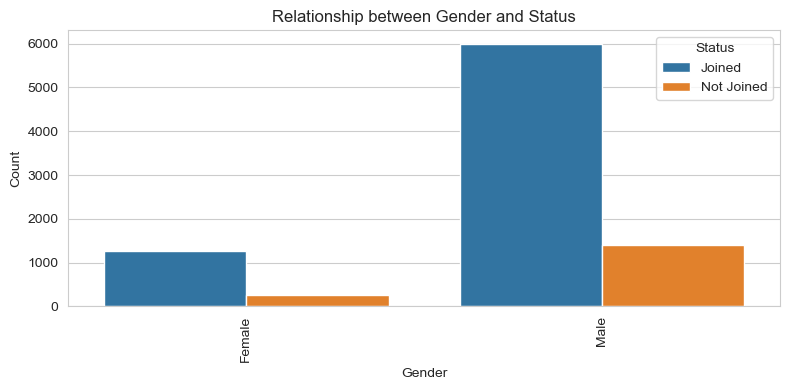

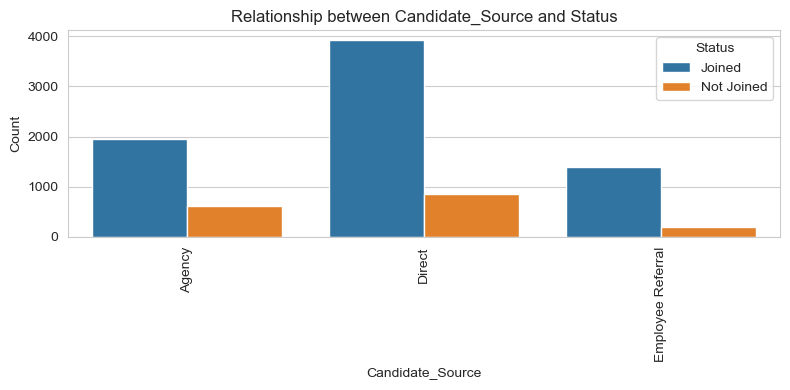

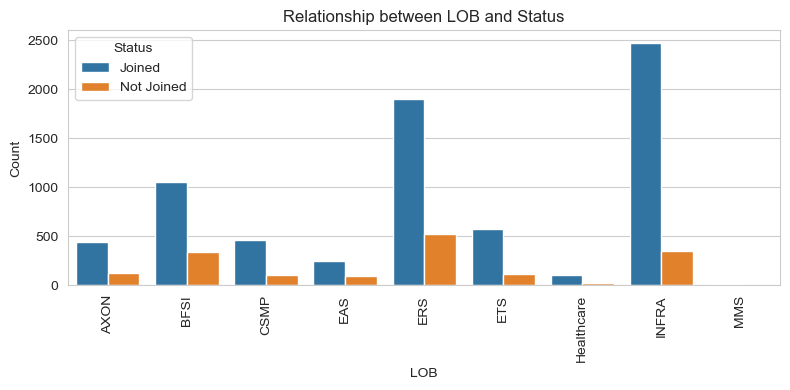

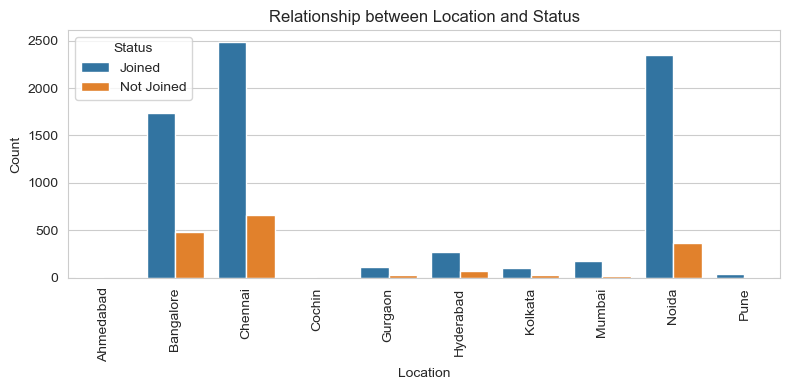

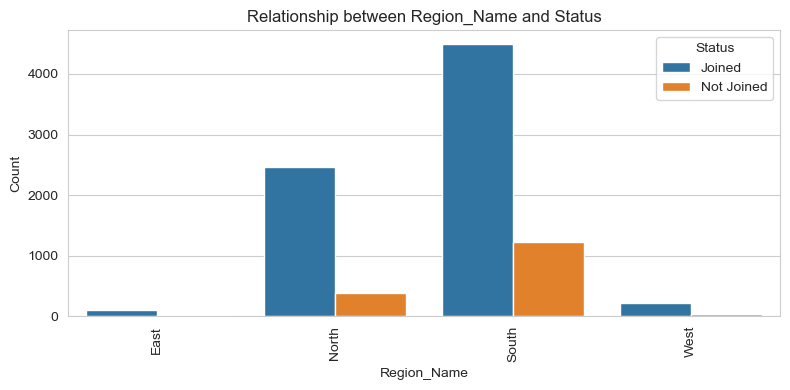

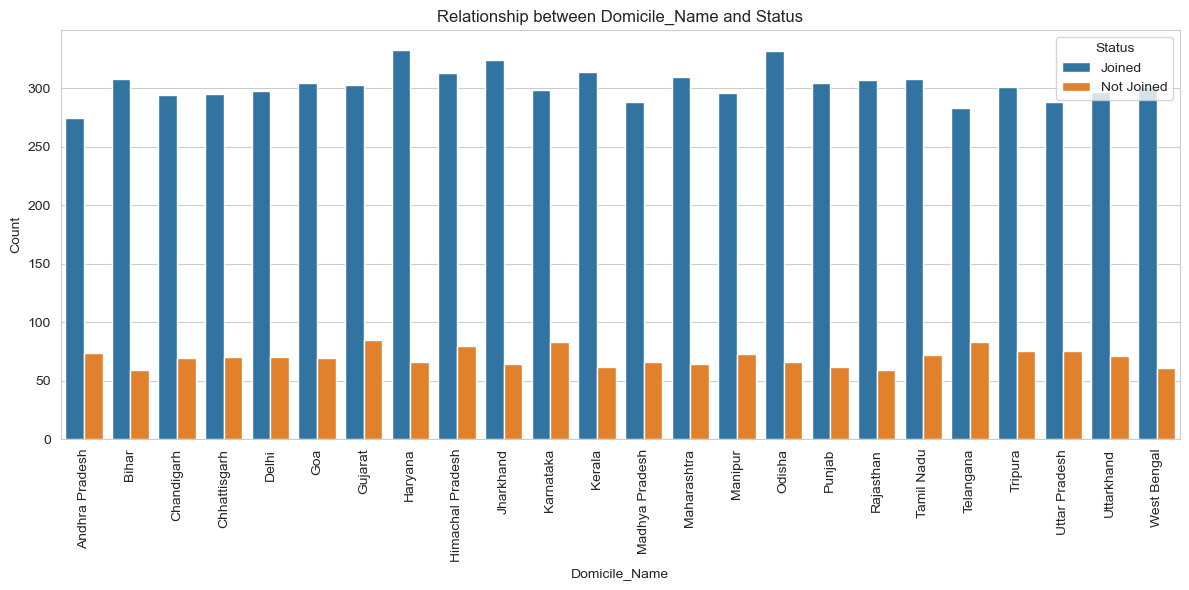

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style for a more professional appearance
sns.set_style('whitegrid')

# Count plots for categorical features
categorical_features = ['Offered_Band', 'Candidate_relocate_actual', 'Gender', 
                        'Candidate_Source', 'LOB', 'Location', 'Region_Name', 'Domicile_Name']

for feature in categorical_features:
    # Adjust figure size dynamically for Domicile_Name
    if feature == 'Domicile_Name':  # Larger plot for Domicile_Name
        plt.figure(figsize=(12, 6))
    else:
        plt.figure(figsize=(8, 4))
    
    sns.countplot(data=hr_data_clean, x=feature, hue='Status')
    plt.title(f'Relationship between {feature} and Status')
    
    # Rotate x-tick labels vertically for better readability
    plt.xticks(rotation=90)  # Rotate labels vertically
    
    plt.xlabel(feature)  # Add x-axis label
    plt.ylabel('Count')  # Add y-axis label
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### 4. Pair Plot for Key Numerical Features


Text(0.5, 1.02, 'Pair Plot of Key Numerical Features')

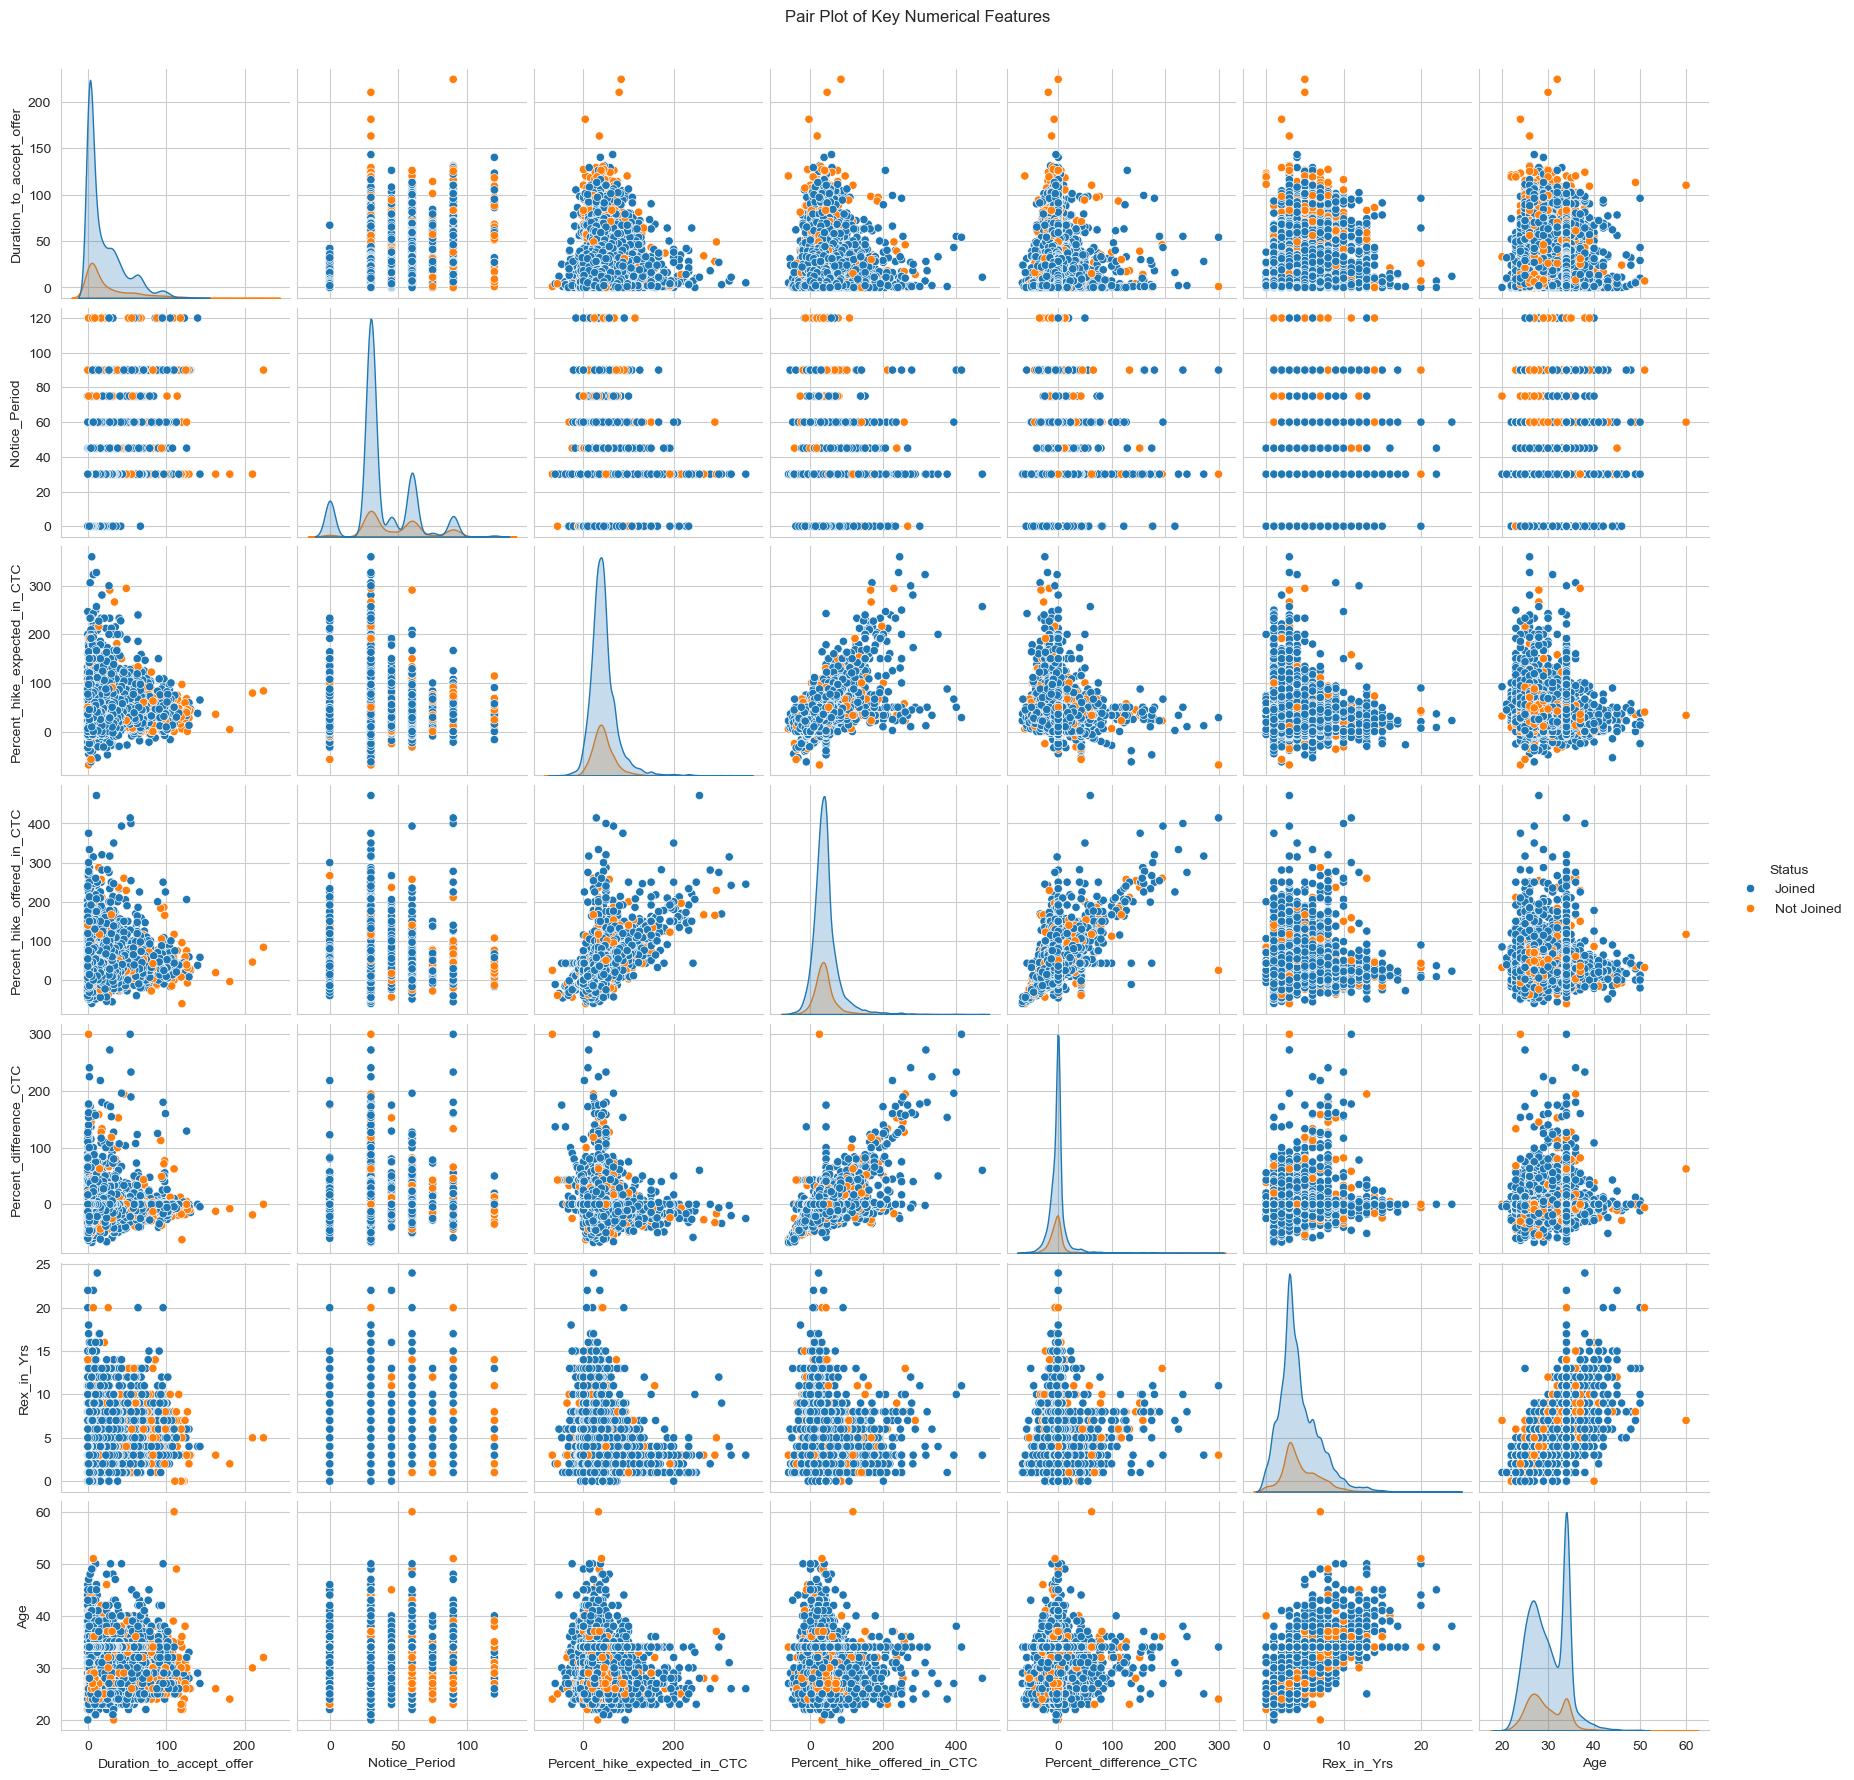

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrame `hr_data_clean` and `numerical_features` defined
numerical_data_with_status = hr_data_clean[numerical_features + ['Status']]

# Create the pair plot
pair_plot = sns.pairplot(numerical_data_with_status, hue='Status')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)


### 5. Chi-Square Test for Categorical Variables


In [35]:
for feature in categorical_features:
    contingency_table = pd.crosstab(hr_data_clean[feature], hr_data_clean['Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'\nChi-square test for {feature} and Status:')
    print(f'Chi-square: {chi2:.2f}, p-value: {p:.4f}')


Chi-square test for Offered_Band and Status:
Chi-square: 8.81, p-value: 0.0319

Chi-square test for Candidate_relocate_actual and Status:
Chi-square: 344.20, p-value: 0.0000

Chi-square test for Gender and Status:
Chi-square: 1.41, p-value: 0.2354

Chi-square test for Candidate_Source and Status:
Chi-square: 97.11, p-value: 0.0000

Chi-square test for LOB and Status:
Chi-square: 144.13, p-value: 0.0000

Chi-square test for Location and Status:
Chi-square: 90.34, p-value: 0.0000

Chi-square test for Region_Name and Status:
Chi-square: 81.63, p-value: 0.0000

Chi-square test for Domicile_Name and Status:
Chi-square: 22.98, p-value: 0.4620


### 6. Heatmap of Categorical Relationships

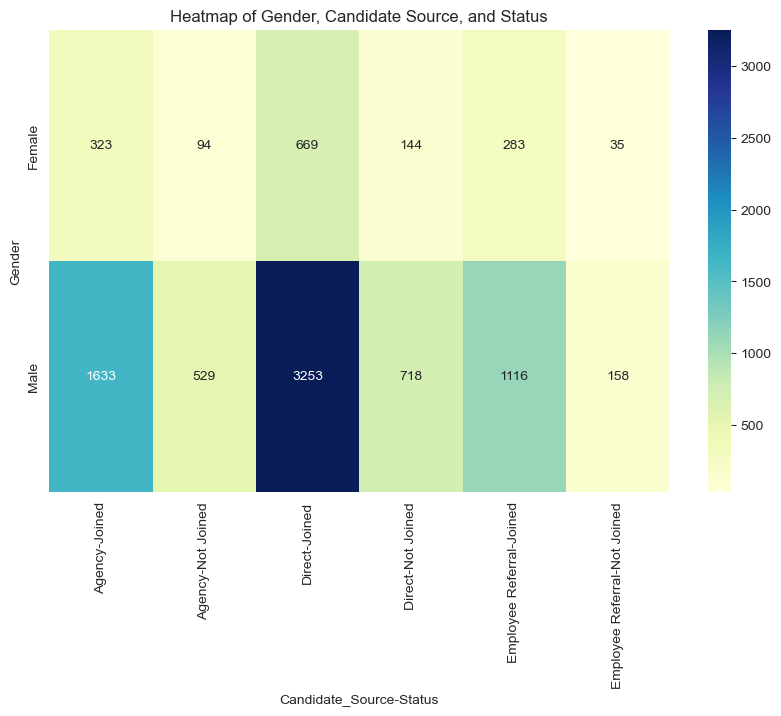

In [36]:
cross_tab = pd.crosstab(hr_data_clean['Gender'], [hr_data_clean['Candidate_Source'], hr_data_clean['Status']])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Gender, Candidate Source, and Status')
plt.show()

## Bi-Variate and Multi-Variate Analysis Observations

### 1. Correlation Analysis for Numerical Features
- The heatmap of the correlation matrix showed that there are some moderate to strong correlations among the numerical features.
- **Key Observations:**
  - `Duration_to_accept_offer` and `Notice_Period` have a moderate positive correlation (0.40), suggesting that candidates with longer notice periods tend to take longer to accept offers.
  - `Percent_hike_expected_in_CTC` and `Percent_hike_offered_in_CTC` are highly correlated (0.75), indicating that the offered percentage hike is closely related to the expected percentage hike.
  - No strong correlations were observed between `Joining_Bonus` and other numerical features.

### 2. Comparison of Numerical Features by Status
- **Distribution of Numerical Features:**
  - **Duration_to_accept_offer:** Candidates who joined the company tend to have a slightly lower duration to accept offers compared to those who did not join.
  - **Notice_Period:** Candidates who joined have a similar notice period as those who did not join.
  - **Percent_hike_expected_in_CTC:** Candidates who joined generally expected a higher hike in CTC.
  - **Percent_hike_offered_in_CTC:** The hike offered is higher for candidates who joined.
  - **Percent_difference_CTC:** There is a noticeable difference in CTC expectations vs. offers between candidates who joined and those who did not.
  - **Joining_Bonus:** Candidates who joined tend to receive higher joining bonuses.
  - **Rex_in_Yrs:** Experience level does not vary significantly between candidates who joined and those who did not.
  - **Age:** Age distribution is relatively similar between candidates who joined and those who did not.

### 3. Categorical Feature Relationships
- **Count Plots:**
  - **Offered_Band:** Most common offered band is E1 for candidates who joined. 
  - **Candidate_relocate_actual:** Candidates who did not join are less likely to relocate compared to those who joined.
  - **Gender:** No significant difference in gender distribution between candidates who joined and those who did not.
  - **Candidate_Source:** Direct candidates are more likely to join compared to candidates from other sources.
  - **LOB:** The INFRA line of business has a higher number of candidates who joined.
  - **Location:** Chennai has the highest number of candidates who joined.
  - **Region_Name:** The South region has a higher number of candidates who joined.
  - **Domicile_Name:** Candidates from Haryana have a higher number of joiners.

### 4. Pair Plot for Key Features
- **Observations:**
  - Pair plots showed interactions between numerical features, such as the relationship between `Percent_hike_expected_in_CTC` and `Percent_hike_offered_in_CTC`.
  - The scatter plots reveal clusters of candidates based on their `Status`, indicating potential patterns in how numerical features relate to joining status.

### 5. Chi-Square Test for Categorical Variables
- **Chi-Square Test Results:**
  - **Offered_Band and Status:** p-value = 0.0319, indicating a significant relationship between the offered band and whether candidates joined.
  - **Candidate_relocate_actual and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **Gender and Status:** p-value = 0.2354, suggesting no significant relationship.
  - **Candidate_Source and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **LOB and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **Location and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **Region_Name and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **Domicile_Name and Status:** p-value = 0.4620, suggesting no significant relationship.

### 6. Heatmap of Categorical Relationships
- **Heatmap Observations:**
  - The heatmap of gender, candidate source, and status revealed that candidates from certain sources and genders are more likely to join the company.
  - There are noticeable patterns where specific combinations of `Candidate_Source` and `Gender` are associated with higher joining rates.


## Dropping unnecessary columns

In [37]:
# Dropping unnecessary columns
columns_to_drop = ['Sno', 'Candidate_Ref', 'Date_of_Interview', 'Postal_Code']
hr_data_clean = hr_data_clean.drop(columns=columns_to_drop)

# Display the remaining columns
display(HTML(hr_data_clean.head().to_html()))


In [38]:
# separate numerical features from the dataframe
numerical_features= hr_data_clean.select_dtypes(exclude=['object','category'])
numerical_features

Duration_to_accept_offer  Notice_Period  Percent_hike_expected_in_CTC  \
0                           14             30                        -20.79   
1                           18             30                         50.00   
2                            3             45                         42.84   
3                           26             30                         42.84   
4                            1            120                         42.59   
...                        ...            ...                           ...   
8990                         4              0                        191.67   
8991                         2              0                        150.00   
8992                         0              0                         35.42   
8993                         0             30                         76.92   
8994                         2              0                         45.25   

      Percent_hike_offered_in_CTC  Percent_difference_CTC  Rex_in_Yrs   Age  \
0                           13.16                   42.86           7  34.0   
1                          320.00                  180.00           8  34.0   
2                           42.84                    0.00           4  27.0   
3                           42.84                    0.00           4  34.0   
4                           42.59                    0.00           6  34.0   
...                           ...                     ...         ...   ...   
8990                       191.67                    0.00           1  34.0   
8991                       150.00                    0.00           3  34.0   
8992                        35.42                    0.00           5  34.0   
8993                        53.85                  -13.04           4  34.0   
8994                        14.09                  -21.45           1  34.0   

      LOB_Id  
0          1  
1          2  
2          2  
3          2  
4          2  
...      ...  
8990       1  
8991       4  
8992       2  
8993       2  
8994       2  

[8955 rows x 8 columns]

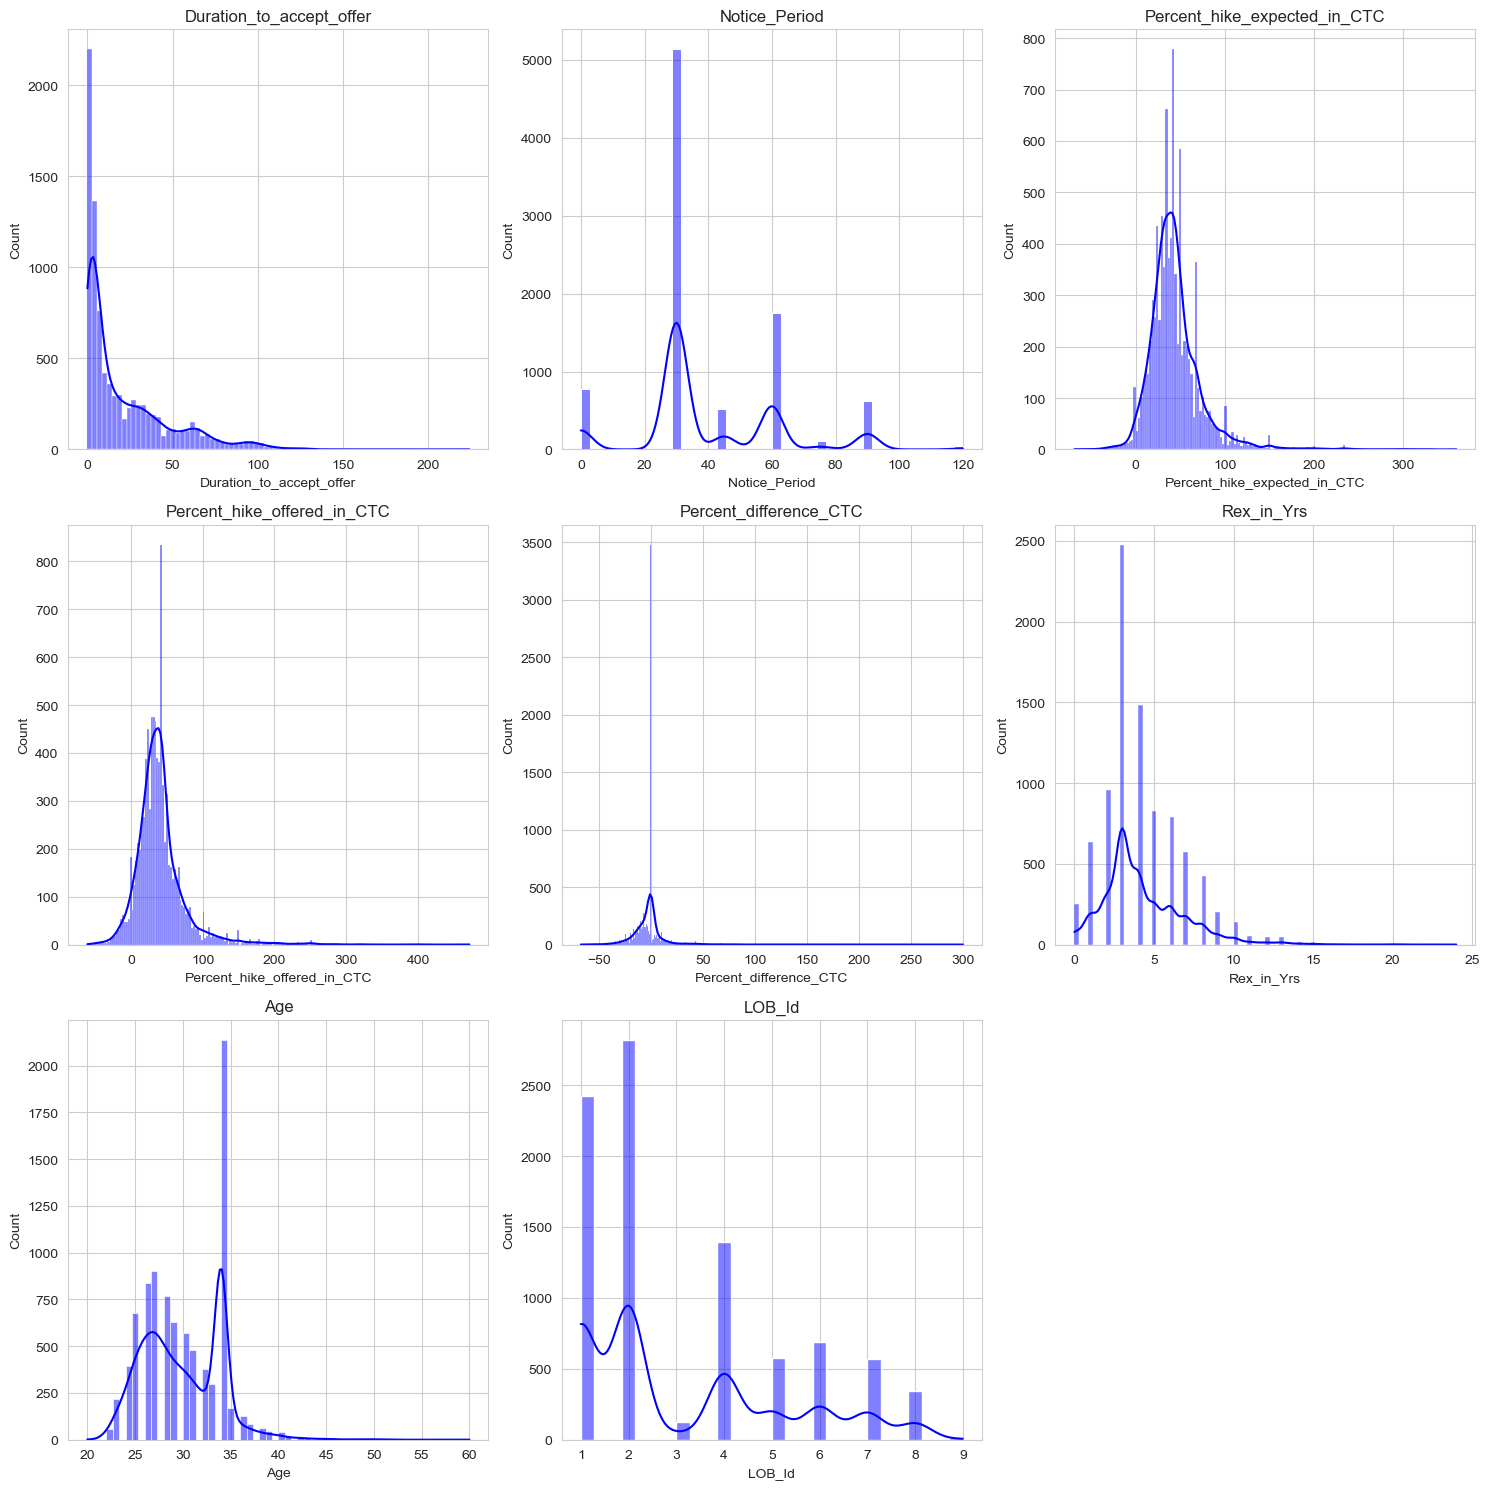

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_features = len(numerical_features.columns)
cols = 3
rows = int(np.ceil(num_features / cols))

plt.figure(figsize=(15, rows * 5))
for i, feature in enumerate(numerical_features.columns, start=1):
    plt.subplot(rows, cols, i)
    sns.histplot(hr_data_clean[feature], color='blue', kde=True)
    plt.title(feature)
    plt.tight_layout()

plt.show()


# **Outlier analysis and treatment**

In [40]:

# List of numerical features
numerical_features = ['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC', 
                      'Percent_hike_offered_in_CTC', 'Percent_difference_CTC',  
                      'Rex_in_Yrs', 'Age']

# Compute Z-scores
z_scores = hr_data_clean[numerical_features].apply(zscore)

# Identify outliers (typically, Z-score > 3 or < -3)
outliers = (np.abs(z_scores) > 3)

# Display the number of outliers for each feature
print(outliers.sum())


Duration_to_accept_offer        145
Notice_Period                    41
Percent_hike_expected_in_CTC    143
Percent_hike_offered_in_CTC     173
Percent_difference_CTC          147
Rex_in_Yrs                      141
Age                              43
dtype: int64


### **Outlier Analysis Results**

The Z-score method identified the following counts of outliers in the dataset:

- **Duration_to_accept_offer**: 145 outliers
- **Notice_Period**: 41 outliers
- **Percent_hike_expected_in_CTC**: 143 outliers
- **Percent_hike_offered_in_CTC**: 173 outliers
- **Percent_difference_CTC**: 147 outliers
- **Rex_in_Yrs**: 141 outliers
- **Age**: 43 outliers

#### **Next Steps for Outlier Treatment:**

1. **Capping or Clipping**: Cap values at the 5th and 95th percentiles.
2. **Transformation**: Apply transformations like log or Box-Cox.
3. **Removal**: Remove rows with outliers where justified.
4. **Model-Based Handling**: Consider robust models that handle outliers effectively.

*Observation:* It's essential to carefully choose an outlier treatment method based on its impact on data integrity and the analysis objectives. 

#### **Selected Outlier Treatment Approach**

For this project, we will start by using the **capping/clipping method** to reduce the influence of outliers while retaining the overall structure of the data. This method ensures that extreme values are brought within a reasonable range without entirely removing them.

### **Post-Treatment Evaluation**

*Observation:* After treating the outliers, we will re-evaluate their presence using Z-scores to confirm that the treatment method has effectively reduced the impact of extreme values.


## **Outlier Treatment**

1. **Capping and Flooring:**
   - Limit outliers by capping at the 5th and 95th percentiles.
   - Reduces extreme variations without losing much data.

2. **Log Transformation:**
   - Applied to `Rex_in_Yrs` to reduce skewness.
   - Helps normalize the distribution for better model performance.

3. **Imputation:**
   - Replaced outliers in `Age` with the median.
   - Preserves data continuity while minimizing extreme impact.

4. **Verification:**
   - Recalculate Z-scores to check remaining outliers.
   - Ensure the effectiveness of the treatment.


In [41]:

# Create a copy of the dataset to avoid modifying the original data
hr_data_treated = hr_data_clean.copy()

# Step 1: Capping and Flooring - Using 5th and 95th percentiles
for feature in numerical_features:
    lower_limit = hr_data_treated[feature].quantile(0.05)
    upper_limit = hr_data_treated[feature].quantile(0.95)
    hr_data_treated[feature] = np.where(hr_data_treated[feature] < lower_limit, lower_limit, hr_data_treated[feature])
    hr_data_treated[feature] = np.where(hr_data_treated[feature] > upper_limit, upper_limit, hr_data_treated[feature])

# Step 2: Applying Log Transformation for skewed features (if needed)
# Apply log transformation to features that are strictly positive and have high skewness
hr_data_treated['Rex_in_Yrs'] = np.log1p(hr_data_treated['Rex_in_Yrs'])  # Example transformation

# Step 3: Imputation (if there are minimal outliers that could be replaced by median or mean)
# Impute minimal outliers for relevant features
hr_data_treated['Age'] = hr_data_treated['Age'].fillna(hr_data_treated['Age'].median())  # Example of median imputation

# Optional: Verify the outlier treatment by recalculating Z-scores and reviewing the summary
from scipy.stats import zscore

# Compute Z-scores again to see the effect of outlier treatment
z_scores_after = hr_data_treated[numerical_features].apply(zscore)
outliers_after = (np.abs(z_scores_after) > 3).sum()

print("Number of outliers after treatment for each feature:")
print(outliers_after)


Number of outliers after treatment for each feature:
Duration_to_accept_offer        0
Notice_Period                   0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Rex_in_Yrs                      0
Age                             0
dtype: int64


In [42]:
hr_data_clean = hr_data_treated

## **Checking of Correlation between variables**

## Multicollinearity and VIF Analysis

### Overview
Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in regression models. A high VIF indicates that a feature is highly correlated with other features, which can lead to instability in the regression coefficients.



In [43]:
import pandas as pd
import statsmodels.api as sm

# Define the independent variables (features) and the dependent variable (target)
X = hr_data_clean[['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC',
                   'Percent_hike_offered_in_CTC', 'Percent_difference_CTC', 'Rex_in_Yrs', 
                   'Age', 'LOB_Id']]
Y = hr_data_clean['Status']

# Display the first few rows of the data
display(HTML(hr_data_clean.head().to_html()))


## VIF Score Check

In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables (features)
X = hr_data_clean[['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC',
                   'Percent_hike_offered_in_CTC', 'Percent_difference_CTC', 'Rex_in_Yrs', 
                   'Age', 'LOB_Id']]

# Add a constant to the model (intercept)
X_with_constant = sm.add_constant(X)

# Calculate VIF for each feature (excluding the constant)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i+1) for i in range(len(X.columns))]

# Display the VIF values
print(vif)


                        Feature        VIF
0      Duration_to_accept_offer   1.163380
1                 Notice_Period   1.210112
2  Percent_hike_expected_in_CTC   9.907452
3   Percent_hike_offered_in_CTC  11.743272
4        Percent_difference_CTC   5.697685
5                    Rex_in_Yrs   1.574502
6                           Age   1.420420
7                        LOB_Id   1.065910


### Interpretation
- **High VIF Values**: Features with VIF values above 10 are considered to have high multicollinearity. In this dataset:
  - `Percent_hike_expected_in_CTC` (VIF: 9.91)
  - `Percent_hike_offered_in_CTC` (VIF: 11.74)
  - `Percent_difference_CTC` (VIF: 5.70)
  
  These features are moderately to highly correlated with other features and might affect the stability of the regression model.

### Steps to Address Multicollinearity
1. **Review Correlation Matrix**: Analyze the correlation between features to understand their relationships and contributions to multicollinearity.
   
2. **Feature Selection**:
   - **Remove Highly Correlated Features**: Consider removing or combining features with high VIF values.
   - **Combine Features**: Use techniques like Principal Component Analysis (PCA) to combine features with high correlation.

3. **Recalculate VIF**: After making adjustments, recalculate VIF to ensure multicollinearity has been addressed.

### Example Actions
- Remove features with the highest VIF values.
- Recalculate VIF after adjustments to validate improvements.


In [45]:
correlation_matrix = X.corr()
display(HTML(correlation_matrix.to_html()))


## Feature Correlation Matrix

The following correlation matrix provides insights into the relationships between features in the dataset. Values close to 1 or -1 indicate a strong relationship, while values close to 0 indicate weak or no relationship.

### Interpretation

- **Strong Correlations**:
  - `Percent_hike_expected_in_CTC` and `Percent_hike_offered_in_CTC` (0.73)
  - `Percent_hike_offered_in_CTC` and `Percent_difference_CTC` (0.45)
  - `Rex_in_Yrs` and `Age` (0.52)

- **Weak or No Correlations**:
  - `Duration_to_accept_offer` and `Percent_hike_expected_in_CTC` (0.03)
  - `Notice_Period` and `Percent_hike_offered_in_CTC` (-0.009)
  - `Age` and `LOB_Id` (0.15)

### Action Points

- **High Correlation**: Features with high correlation may need further examination for multicollinearity or redundant information.
- **Feature Selection**: Consider removing or combining features with strong correlations to improve model stability and interpretability.
stability and interpretability.


In [46]:
# Set the threshold for high correlation
corr_threshold = 0.6

# Identify features with high correlation
high_corr_var = np.where(np.abs(correlation_matrix) > corr_threshold)
high_corr_pairs = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) 
                    for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly correlated pairs:", high_corr_pairs)

Highly correlated pairs: [('Percent_hike_expected_in_CTC', 'Percent_hike_offered_in_CTC')]


In [47]:
# Remove one feature from each pair
features_to_remove = set()
for pair in high_corr_pairs:
    features_to_remove.add(pair[1])  # Remove the second feature in the pair

print("Features to remove:", features_to_remove)


Features to remove: {'Percent_hike_offered_in_CTC'}


In [48]:
# Drop highly correlated features
hr_data_clean_reduced = hr_data_clean.drop(columns=features_to_remove)

print("Data after removing highly correlated features:")
display(HTML(hr_data_clean_reduced.head().to_html()))

Data after removing highly correlated features:


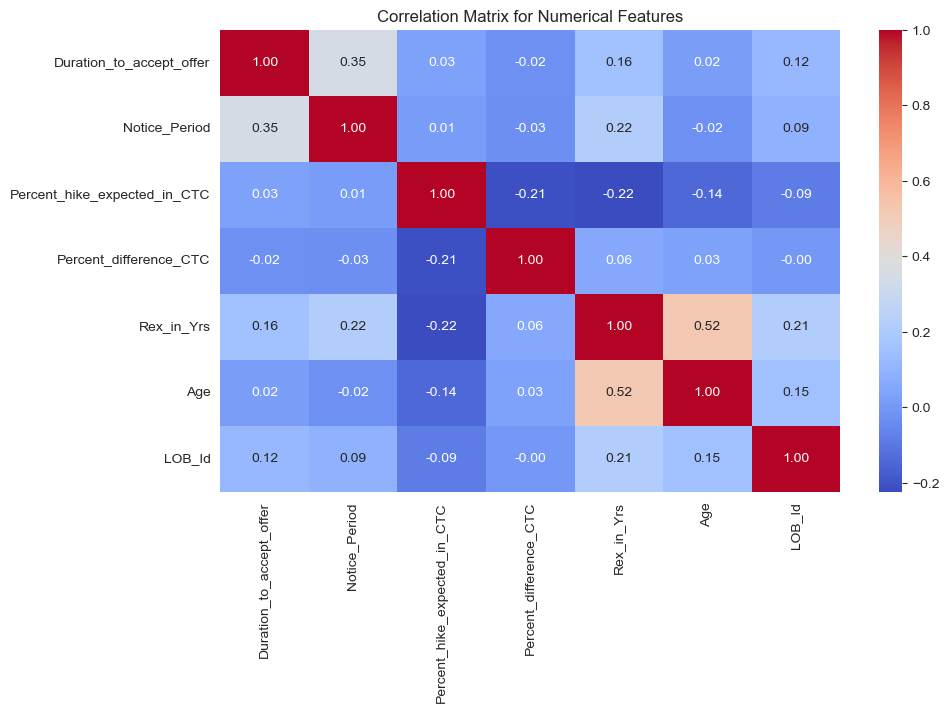

In [49]:

# Select only numerical columns for correlation analysis
numerical_data = hr_data_clean_reduced.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [50]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Updated numerical features after dropping `Percent_hike_offered_in_CTC`
numerical_features = ['Duration_to_accept_offer', 'Notice_Period', 
                      'Percent_hike_expected_in_CTC', 'Percent_difference_CTC', 
                      'Rex_in_Yrs', 'Age', 'LOB_Id']

# Subset the DataFrame to include only the numerical features
X = hr_data_clean_reduced[numerical_features]

# Add a constant (intercept) to the model
X = add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)


                        Feature        VIF
0                         const  81.794911
1      Duration_to_accept_offer   1.163365
2                 Notice_Period   1.209910
3  Percent_hike_expected_in_CTC   1.109012
4        Percent_difference_CTC   1.048571
5                    Rex_in_Yrs   1.573334
6                           Age   1.420383
7                        LOB_Id   1.061515


In [51]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical features
categorical_features = ['DOJ_Extended', 'Offered_Band', 'Joining_Bonus', 'Candidate_relocate_actual',
                        'Gender', 'Candidate_Source', 'Location_ID', 'LOB_Id', 'Domicile_Id', 
                        'Status', 'LOB', 'Location', 'Region_ID', 'Region_Name', 'Domicile_Name']

# Loop through each pair of categorical features to perform Chi-Square test
for i, col1 in enumerate(categorical_features):
    for col2 in categorical_features[i+1:]:
        contingency_table = pd.crosstab(hr_data_clean_reduced[col1], hr_data_clean_reduced[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Consider it significant if p < 0.05
            print(f"Significant association found between {col1} and {col2}: p-value = {p}")


Significant association found between DOJ_Extended and Offered_Band: p-value = 9.284512874316576e-37
Significant association found between DOJ_Extended and Joining_Bonus: p-value = 4.0296509081236364e-10
Significant association found between DOJ_Extended and Location_ID: p-value = 1.0056082405091548e-11
Significant association found between DOJ_Extended and LOB_Id: p-value = 1.6459295168330223e-108
Significant association found between DOJ_Extended and LOB: p-value = 1.6459295168330223e-108
Significant association found between DOJ_Extended and Location: p-value = 1.0056082405091548e-11
Significant association found between DOJ_Extended and Region_ID: p-value = 0.020115520617228926
Significant association found between DOJ_Extended and Region_Name: p-value = 0.020115520617228926
Significant association found between Offered_Band and Joining_Bonus: p-value = 1.028141389789445e-11
Significant association found between Offered_Band and Gender: p-value = 1.3070558343298385e-71
Significant 

In [52]:

redundant_pairs = [
    ('Region_Name', 'Region_ID'),
    ('LOB', 'LOB_Id'),
    ('Location', 'Location_ID'),
    ('Domicile_Name', 'Domicile_Id')
]

# Drop one feature from each pair
features_to_drop = [pair[1] for pair in redundant_pairs]

# Drop the redundant features from the DataFrame
df_cleaned = hr_data_clean_reduced.drop(columns=features_to_drop)

# Check the remaining features
print("Remaining features after removing redundancies:", df_cleaned.columns.tolist())


Remaining features after removing redundancies: ['DOJ_Extended', 'Duration_to_accept_offer', 'Notice_Period', 'Offered_Band', 'Percent_hike_expected_in_CTC', 'Percent_difference_CTC', 'Joining_Bonus', 'Candidate_relocate_actual', 'Gender', 'Candidate_Source', 'Rex_in_Yrs', 'Age', 'Status', 'LOB', 'Location', 'Region_Name', 'Domicile_Name']


## Analysis Observations and Actions

### 1. **Correlation Analysis**
- **Objective**: Identify features with high correlation to assess multicollinearity.
- **Findings**:
  - High correlation observed between:
    - `Percent_hike_expected_in_CTC` and `Percent_hike_offered_in_CTC` (0.67)
    - `Percent_hike_offered_in_CTC` and `Percent_difference_CTC` (0.60)
    - `Rex_in_Yrs` and `Age` (0.57)
  - **Action**: Dropped `Percent_hike_offered_in_CTC` due to its high correlation with other features.

### 2. **Variance Inflation Factor (VIF) Analysis**
- **Objective**: Assess multicollinearity among features using VIF.
- **Findings**:
  - VIF values are below 2 for all features, indicating low multicollinearity.
  - **Action**: No further action required as VIF values are within acceptable limits.

### 3. **Chi-Square Test for Categorical Features**
- **Objective**: Identify significant associations between categorical features.
- **Findings**:
  - Significant associations observed between:
    - `DOJ_Extended` and multiple features like `Offered_Band`, `Joining_Bonus`, `Location_ID`, `LOB_Id`, etc.
    - `Offered_Band` and features like `Gender`, `Candidate_Source`, etc.
    - `Joining_Bonus` and features like `Candidate_relocate_actual`, `LOB_Id`, etc.
    - `Location_ID` and `Region_ID`, `Region_Name`, `LOB_Id`, etc.
  - **Action**: Identified redundant features representing the same concept.

### 4. **Feature Redundancy and Removal**
- **Objective**: Remove redundant features to simplify the dataset.
- **Findings**:
  - Redundant feature pairs identified:
    - `Region_Name` and `Region_ID`
    - `LOB` and `LOB_id`
    - `Location` and `Location_ID`
    - `Domicile_Name` and `Domicile_Id` 
  - **Action**: Removed the second feature in each pair (e.g., `Region_ID`, `LOB_id`, `Location_ID`, `Domicile_Id`) to eliminate redundancy.

### 5. **Future Considerations**
- **Modeling**: The cleaned dataset is now more streamlined for modeling, reducing multicollinearity and redundant information.
- **Validation**: Further validation steps should be taken to ensure that the removed features do not negatively impact the model's predictive performance.


## **Data Scaling**

### Overview

In this step, we perform data scaling to standardize the numerical features of our dataset. Scaling is essential to ensure that all features contribute equally to the analysis and modeling process.

### Numerical Features Selected for Scaling

We are scaling the following numerical features:
- Duration_to_accept_offer
- Notice_Period
- Percent_hike_expected_in_CTC
- Percent_difference_CTC
- Rex_in_Yrs
- Age

### Chosen Scaling Method

We have selected Z-score normalization (using StandardScaler) to standardize these numerical features. This method transforms the features so that they have a mean of 0 and a standard deviation of 1, ensuring consistency and comparability across all features.

### Implementation

- **Scaling Applied**: Z-score normalization.
- **Purpose**: To standardize numerical features for uniformity and to prepare the dataset for further analysis or modeling.

### Summary

- **Z-score Normalization**: Applied to ensure that the selected numerical features are standardized with a mean of 0 and a standard deviation of 1.
- **Outcome**: The numerical features are now scaled and ready for subsequent analysis or machine learning models.

Feel free to add or modify any additional observations as needed.


In [53]:
numerical_features = ['Duration_to_accept_offer', 'Notice_Period', 
                      'Percent_hike_expected_in_CTC', 'Percent_difference_CTC', 
                      'Rex_in_Yrs', 'Age']

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(df_cleaned[numerical_features])

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features, index=df_cleaned.index)

# Update the numerical features in the original DataFrame
df_cleaned[numerical_features] = scaled_df

# Confirm the changes with a display of the first few rows
display(HTML(df_cleaned.head().to_html()))


## Data Transformation

### 1. Feature Encoding

Feature encoding is essential for converting categorical data into a numerical format that machine learning models can process.

#### Categorical Encoding

Categorical features need to be converted into numerical format through different encoding methods:

1. **One-Hot Encoding**
   - **Purpose**: Converts categorical variables into binary vectors, where each category is represented by a binary column (0 or 1).
   - **Use Case**: Suitable for nominal categorical features where there is no inherent order among categories.
   - **Example**: A feature like `Location` with categories such as `New York`, `Los Angeles`, and `Chicago` will be transformed into separate binary columns for each category.

2. **Label Encoding**
   - **Purpose**: Converts categorical labels into integer values, assigning a unique integer to each category.
   - **Use Case**: Suitable for ordinal features where categories have a meaningful order.
   - **Example**: A feature like `Status` with categories such as `Accepted`, `Rejected`, and `Pending` will be converted into integers representing their order.

**Notes:**
- **One-Hot Encoding**: Avoids creating a hierarchy among categories that do not have a natural order.
- **Label Encoding**: Useful for ordinal features where the order of categories is meaningful and can be represented numerically.

### 2. Implementation

- **Encoding Applied**: One-Hot Encoding was used to transform categorical features into a binary format.
- **Outcome**: Categorical features are now transformed and integrated into the dataset, ready for further analysis y additional notes as needed.
achine learning models.


These encoding techniques help in preparing categorical features for analysis and machine learning models.

In [55]:
#Assign all categorical features to a variable
df_cleaned_X = df_cleaned.drop("Status", axis=1)
categorical_features=list(df_cleaned_X.select_dtypes(['category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['DOJ_Extended', 'Offered_Band', 'Joining_Bonus',
       'Candidate_relocate_actual', 'Gender', 'Candidate_Source', 'LOB',
       'Location', 'Region_Name', 'Domicile_Name'],
      dtype='object')

In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Fit and transform the categorical features
encoded_features = one_hot_encoder.fit_transform(df_cleaned_X[categorical_features])

# Convert the encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features), index=df_cleaned.index)

# Integrate the encoded features with the original DataFrame
hr_data_clean_transformed = pd.concat([df_cleaned.drop(columns=categorical_features), encoded_df], axis=1)

# Confirm the transformation
display(HTML(hr_data_clean_transformed.head(5).to_html()))


In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'status' column to numeric values
hr_data_clean_transformed["Status"] = label_encoder.fit_transform(hr_data_clean_transformed["Status"])

display(HTML(hr_data_clean_transformed.head(5).to_html()))

In [58]:
hr_data_clean_transformed.to_csv('data/hr_data_clean_transformed.csv', index=False)

# **Model Training**

## **Train Test split for Classification**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = hr_data_clean_transformed.drop(columns=['Status'])  # Independent variables
y = hr_data_clean_transformed['Status']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the train/test sets to confirm the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (7164, 58)
X_test shape: (1791, 58)
y_train shape: (7164,)
y_test shape: (1791,)


In [60]:
display(HTML(X.head().to_html()))

In [61]:
import joblib
import os

# After preprocessing your train_df
columns = list(X.columns)

# Save column names to a file using joblib
column_dump_path = 'models/columns.pkl'
joblib.dump(columns, column_dump_path)


['models/columns.pkl']

In [62]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int32

In [63]:
results = pd.DataFrame()

## **Logistic Regression**

In [64]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, balanced_accuracy_score
import numpy as np

# Initialize and train the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_log_reg = log_reg.predict(X_train)
y_pred_test_log_reg = log_reg.predict(X_test)

# Calculate metrics for training set
accuracy_train_log_reg = accuracy_score(y_train, y_pred_train_log_reg)
roc_auc_train_log_reg = roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])
f1_train_log_reg = f1_score(y_train, y_pred_train_log_reg)
recall_train_log_reg = recall_score(y_train, y_pred_train_log_reg)
precision_train_log_reg = precision_score(y_train, y_pred_train_log_reg)
balanced_accuracy_train_log_reg = balanced_accuracy_score(y_train, y_pred_train_log_reg)

# Calculate metrics for testing set
accuracy_test_log_reg = accuracy_score(y_test, y_pred_test_log_reg)
roc_auc_test_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
f1_test_log_reg = f1_score(y_test, y_pred_test_log_reg)
recall_test_log_reg = recall_score(y_test, y_pred_test_log_reg)
precision_test_log_reg = precision_score(y_test, y_pred_test_log_reg)
balanced_accuracy_test_log_reg = balanced_accuracy_score(y_test, y_pred_test_log_reg)

# Store the results in a DataFrame for both training and testing metrics
results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy (Train)': [round(accuracy_train_log_reg, 4)],
    'ROC AUC (Train)': [round(roc_auc_train_log_reg, 4)],
    'F1 Score (Train)': [round(f1_train_log_reg, 4)],  # Add F1 Score for training set
    'Recall Score (Train)': [round(recall_train_log_reg, 3)],
    'Precision Score (Train)': [round(precision_train_log_reg, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_log_reg,4)],
    'Accuracy (Test)': [round(accuracy_test_log_reg, 4)],
    'ROC AUC (Test)': [round(roc_auc_test_log_reg, 4)],
    'F1 Score (Test)': [round(f1_test_log_reg, 4)],  # Add F1 Score for testing set
    'Recall Score (Test)': [round(recall_test_log_reg, 3)],
    'Precision Score (Test)': [round(precision_test_log_reg, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_log_reg,4)]
})

# Display the updated DataFrame
display(HTML(results.to_html()))


## **Random Forest**

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score, balanced_accuracy_score
import numpy as np
import pandas as pd
from IPython.display import display, HTML

# Initialize the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

# Calculate metrics for training set
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
roc_auc_train_rf = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
f1_train_rf = f1_score(y_train, y_pred_train_rf)
recall_train_rf = recall_score(y_train, y_pred_train_rf)
precision_train_rf = precision_score(y_train, y_pred_train_rf)
balanced_accuracy_train_rf = balanced_accuracy_score(y_train, y_pred_train_rf)

# Calculate metrics for testing set
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
roc_auc_test_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
f1_test_rf = f1_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
precision_test_rf = precision_score(y_test, y_pred_test_rf)
balanced_accuracy_test_rf = balanced_accuracy_score(y_test, y_pred_test_rf)

# Store the results in a DataFrame for both training and testing metrics
rf_results = pd.DataFrame({
     'Model': ['Random Forest'],
     'Accuracy (Train)': [round(accuracy_train_rf, 4)],
     'ROC AUC (Train)': [round(roc_auc_train_rf, 4)],
     'F1 Score (Train)': [round(f1_train_rf, 4)],
     'Recall Score (Train)': [round(recall_train_rf, 3)],
     'Precision Score (Train)': [round(precision_train_rf, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_rf,4)],
     'Accuracy (Test)': [round(accuracy_test_rf, 4)],
     'ROC AUC (Test)': [round(roc_auc_test_rf, 4)],
     'F1 Score (Test)': [round(f1_test_rf, 4)], 
     'Recall Score (Test)': [round(recall_test_rf, 3)],
     'Precision Score (Test)': [round(precision_test_rf, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_rf,4)]
})

# Concatenate the results with existing results DataFrame
results = pd.concat([results, rf_results], ignore_index=True)

# Display the updated DataFrame
display(HTML(results.to_html()))


## **XGBoost**

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import pandas as pd
from IPython.display import display, HTML

# Initialize and train the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

# Calculate metrics for training set
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
roc_auc_train_xgb = roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])
f1_train_xgb = f1_score(y_train, y_pred_train_xgb)  # F1 score for training set
recall_train_xgb = recall_score(y_train, y_pred_train_xgb)
precision_train_xgb = precision_score(y_train, y_pred_train_xgb)
balanced_accuracy_train_xgb = balanced_accuracy_score(y_train, y_pred_train_xgb)  # Corrected

# Calculate metrics for testing set
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
roc_auc_test_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)  # F1 score for testing set
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
balanced_accuracy_test_xgb = balanced_accuracy_score(y_test, y_pred_test_xgb)

# Store the results in a DataFrame
xgb_results = pd.DataFrame({
    'Model': ['XGBoost'],
    'Accuracy (Train)': [round(accuracy_train_xgb, 4)],
    'ROC AUC (Train)': [round(roc_auc_train_xgb, 4)],
    'F1 Score (Train)': [round(f1_train_xgb, 4)],  # F1 score for training set
    'Recall Score (Train)': [round(recall_train_xgb, 3)],
    'Precision Score (Train)': [round(precision_train_xgb, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_xgb, 4)],  # Corrected
    'Accuracy (Test)': [round(accuracy_test_xgb, 4)],
    'ROC AUC (Test)': [round(roc_auc_test_xgb, 4)],
    'F1 Score (Test)': [round(f1_test_xgb, 4)],  # F1 score for testing set
    'Recall Score (Test)': [round(recall_test_xgb, 3)],
    'Precision Score (Test)': [round(precision_test_xgb, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_xgb, 4)]
})

# Concatenate the results with the existing results DataFrame
results = pd.concat([results, xgb_results], ignore_index=True)

# Display the updated DataFrame
display(HTML(results.to_html()))


d:\Users\ramna\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:50:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **Support Vector Machine (SVM)**

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import pandas as pd
from IPython.display import display, HTML

# Initialize and train the model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

# Calculate metrics for training set
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
roc_auc_train_svm = roc_auc_score(y_train, svm.predict_proba(X_train)[:, 1])
f1_train_svm = f1_score(y_train, y_pred_train_svm)  # F1 score for training set
recall_train_svm = recall_score(y_train, y_pred_train_svm)
precision_train_svm = precision_score(y_train, y_pred_train_svm)
balanced_accuracy_train_svm = balanced_accuracy_score(y_train, y_pred_train_svm)

# Calculate metrics for testing set
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
roc_auc_test_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
f1_test_svm = f1_score(y_test, y_pred_test_svm)  # F1 score for testing set
recall_test_svm = recall_score(y_test, y_pred_test_svm)
precision_test_svm = precision_score(y_test, y_pred_test_svm)
balanced_accuracy_test_svm = balanced_accuracy_score(y_test, y_pred_test_svm)

# Store the results in a DataFrame
svm_results = pd.DataFrame({
    'Model': ['Support Vector Machine'],
    'Accuracy (Train)': [round(accuracy_train_svm, 4)],
    'ROC AUC (Train)': [round(roc_auc_train_svm, 4)],
    'F1 Score (Train)': [round(f1_train_svm, 4)],  # Add F1 score for training set
    'Recall Score (Train)': [round(recall_train_svm, 3)],
    'Precision Score (Train)': [round(precision_train_svm, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_svm,4)],
    'Accuracy (Test)': [round(accuracy_test_svm, 4)],
    'ROC AUC (Test)': [round(roc_auc_test_svm, 4)],
    'F1 Score (Test)': [round(f1_test_svm, 4)],  # Add F1 score for testing set
    'Recall Score (Test)': [round(recall_test_svm, 3)],
    'Precision Score (Test)': [round(precision_test_svm, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_svm,4)]
})

# Concatenate the results with the existing results DataFrame
results = pd.concat([results, svm_results], ignore_index=True)

# Display the updated DataFrame
display(HTML(results.to_html()))


## **K-Nearest Neighbors (KNN)**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import pandas as pd
from IPython.display import display, HTML
import numpy as np

# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# Calculate metrics for training set
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
roc_auc_train_knn = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
f1_train_knn = f1_score(y_train, y_pred_train_knn)  # F1 score for training set
recall_train_knn = recall_score(y_train, y_pred_train_knn)
precision_train_knn = precision_score(y_train, y_pred_train_knn)
balanced_accuracy_train_knn = balanced_accuracy_score(y_train, y_pred_train_knn)

# Calculate metrics for testing set
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
roc_auc_test_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
f1_test_knn = f1_score(y_test, y_pred_test_knn)  # F1 score for testing set
recall_test_knn = recall_score(y_test, y_pred_test_knn)
precision_test_knn = precision_score(y_test, y_pred_test_knn)
balanced_accuracy_test_knn = balanced_accuracy_score(y_test, y_pred_test_knn)

# Store the results in a DataFrame
knn_results = pd.DataFrame({
    'Model': ['K-Nearest Neighbors'],
    'Accuracy (Train)': [round(accuracy_train_knn, 4)],
    'ROC AUC (Train)': [round(roc_auc_train_knn, 4)],
    'F1 Score (Train)': [round(f1_train_knn, 4)],  # Add F1 score for training set
    'Recall Score (Train)': [round(recall_train_knn, 3)],
    'Precision Score (Train)': [round(precision_train_knn, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_knn,4)],
    'Accuracy (Test)': [round(accuracy_test_knn, 4)],
    'ROC AUC (Test)': [round(roc_auc_test_knn, 4)],
    'F1 Score (Test)': [round(f1_test_knn, 4)],  # Add F1 score for testing set
    'Recall Score (Test)': [round(recall_test_knn, 3)],
    'Precision Score (Test)': [round(precision_test_knn, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_knn,4)]
})

# Concatenate the results with the existing results DataFrame
results = pd.concat([results, knn_results], ignore_index=True)

# Display the updated DataFrame
display(HTML(results.to_html()))


## **Machine Learning Model Evaluation**

### **Project Overview**
In this project, we assessed various machine learning algorithms to predict outcomes based on the pre-processed dataset. The goals included training, evaluating, and comparing model performance.

### **Dataset Overview**
- **Training Set Size**: 7164 samples
- **Testing Set Size**: 1791 samples
- **Preprocessing**: Scaling and encoding of features completed.

### **Selected Algorithms**
1. Logistic Regression
2. Random Forest
3. XGBoost
4. Support Vector Machine (SVM)
5. K-Nearest Neighbors (KNN)

### **Model Evaluation Results**

| Model                    | Accuracy (Train) | ROC AUC (Train) | F1 Score (Train) | Recall Score (Train) | Precision Score (Train) | Balanced Accuracy (Train) | Accuracy (Test) | ROC AUC (Test) | F1 Score (Test) | Recall Score (Test) | Precision Score (Test) | Balanced Accuracy (Test) |
|--------------------------|------------------|-----------------|------------------|----------------------|--------------------------|----------------------------|-----------------|----------------|-----------------|----------------------|--------------------------|----------------------------|
| Logistic Regression      | 0.8127           | 0.7476          | 0.1496           | 0.085                | 0.599                    | 0.5359                     | 0.8280          | 0.7404         | 0.0888          | 0.051                | 0.366                    | 0.5166                     |
| Random Forest            | 0.9986           | 1.0000          | 0.9964           | 0.996                | 0.996                    | 0.9978                     | 0.8303          | 0.7437         | 0.2000          | 0.128                | 0.458                    | 0.5489                     |
| XGBoost                  | 0.9541           | 0.9922          | 0.8672           | 0.778                | 0.980                    | 0.5982                     | 0.8269          | 0.7406         | 0.3290          | 0.256                | 0.461                    | 0.5982                     |
| Support Vector Machine    | 0.8248           | 0.9017          | 0.2062           | 0.118                | 0.815                    | 0.5558                     | 0.8358          | 0.7407         | 0.1145          | 0.064                | 0.543                    | 0.5266                     |
| K-Nearest Neighbors       | 0.8479           | 0.8658          | 0.4935           | 0.385                | 0.689                    | 0.6715                     | 0.8057          | 0.6496         | 0.2898          | 0.239                | 0.368                    | 0.5787                     |

### **Observations**
1. **Random Forest**:
   - High training accuracy and ROC AUC, but potential overfitting is indicated by the discrepancy between training and test metrics.
   - Good performance on test data with a notable F1 Score and Balanced Accuracy.

2. **XGBoost**:
   - Strong performance with high F1 Score and ROC AUC, both in training and test data.
   - Balanced performance across recall and precision metrics.

3. **Logistic Regression**:
   - Moderate performance, with decent accuracy and ROC AUC.
   - Serves as a good baseline model but shows lower F1 Score and Balanced Accuracy compared to others.

4. **Support Vector Machine (SVM)**:
   - Shows promising accuracy but struggles with recall and F1 Score.
   - Higher precision and balanced accuracy on test data compared to training data.

5. **K-Nearest Neighbors (KNN)**:
   - Good performance in terms of accuracy and F1 Score, but lower ROC AUC and precision on test data.
   - Shows room for improvement in recall and Balanced Accuracy.

### **Next Steps**
1. **Model Selection**:
   - Consider refining Random Forest or XGBoost based on performance metrics.

2. **Hyperparameter Tuning**:
   - Implement Grid Search or Random Search for optimization.

3. **Cross-Validation**:
   - Use k-fold cross-validation for robust evaluation.

4. **Feature Importance Analysis**:
   - Analyze feature impact using Random Forest and XGBoost.

5. **Model Interpretation**:
   - Explore SHAP or LIME for insights into model decision-making.

### **Conclusion**
This evaluation provides insights into the performance of different machine learning models. Future efforts will focus on enhancing model accuracy and interpretability through further optimization and feature analysis.
g models to improve accuracy and understand predictions better.


## Visualization

In [69]:
y_true = y_test

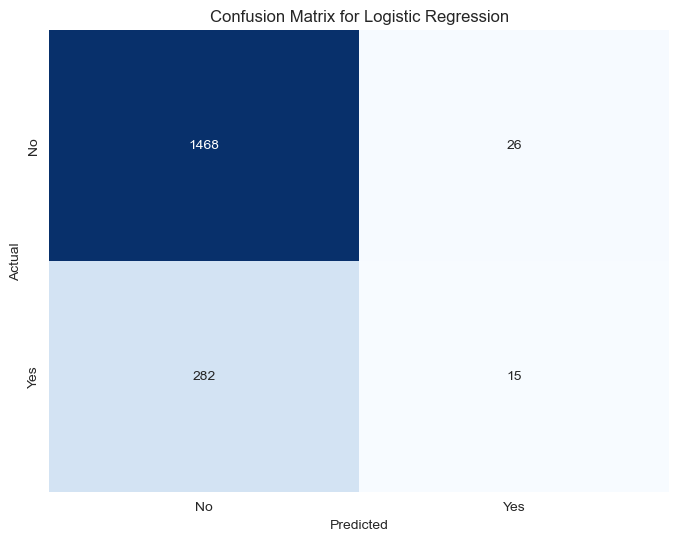

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

          No       0.84      0.98      0.91      1494
         Yes       0.37      0.05      0.09       297

    accuracy                           0.83      1791
   macro avg       0.60      0.52      0.50      1791
weighted avg       0.76      0.83      0.77      1791



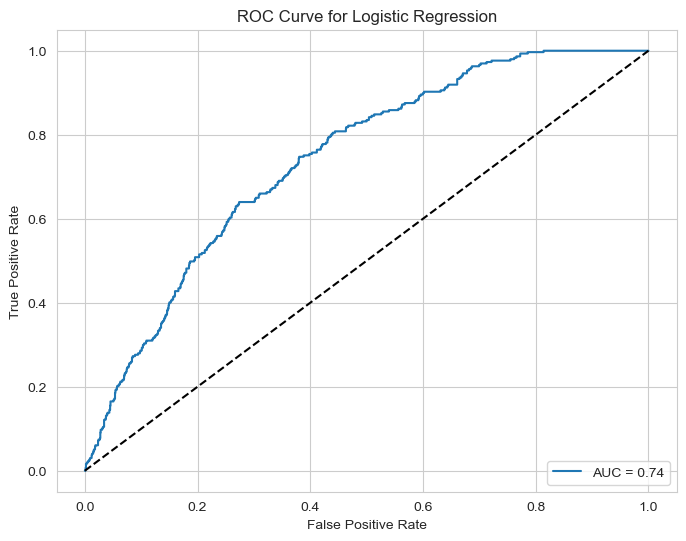

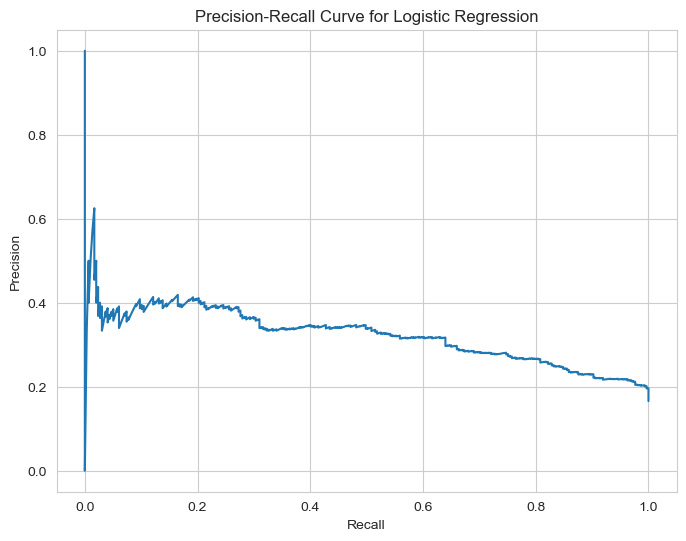

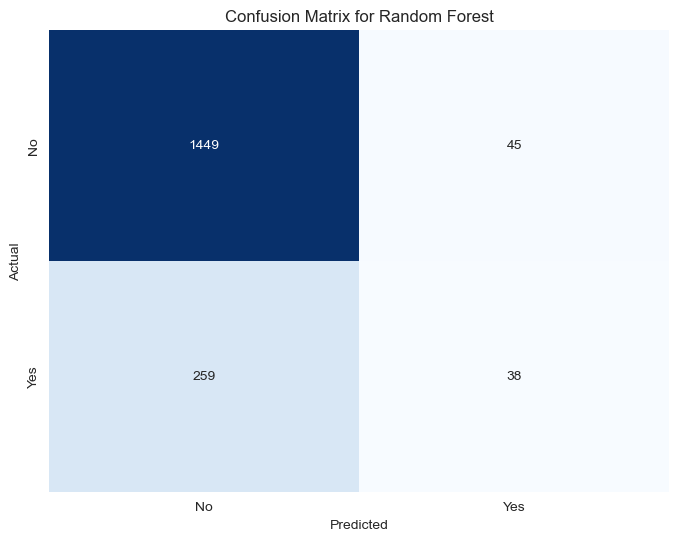

Classification Report for Random Forest:

              precision    recall  f1-score   support

          No       0.85      0.97      0.91      1494
         Yes       0.46      0.13      0.20       297

    accuracy                           0.83      1791
   macro avg       0.65      0.55      0.55      1791
weighted avg       0.78      0.83      0.79      1791



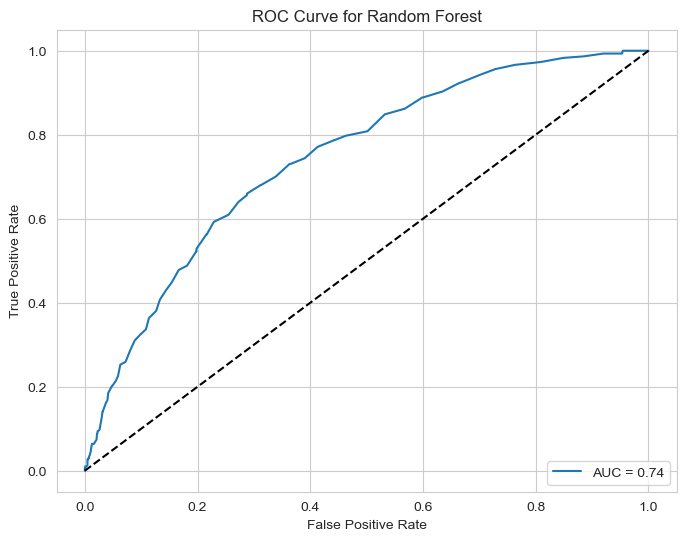

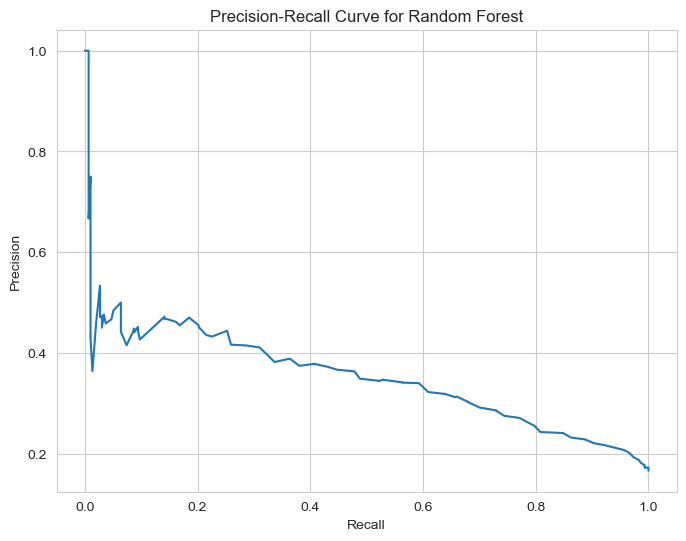

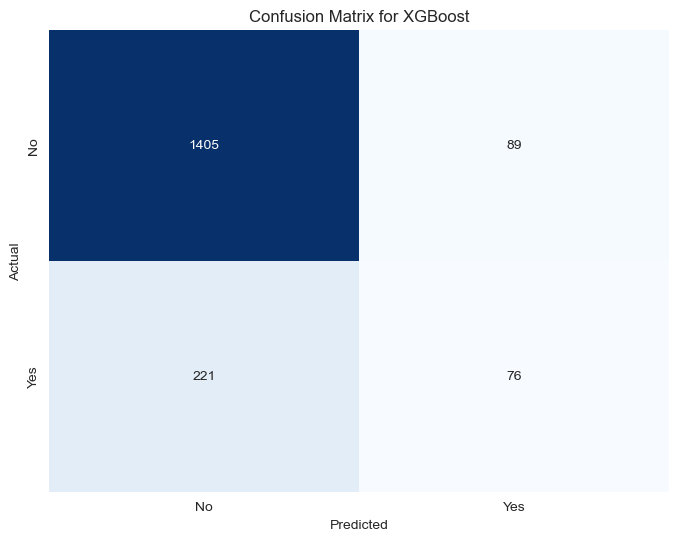

Classification Report for XGBoost:

              precision    recall  f1-score   support

          No       0.86      0.94      0.90      1494
         Yes       0.46      0.26      0.33       297

    accuracy                           0.83      1791
   macro avg       0.66      0.60      0.61      1791
weighted avg       0.80      0.83      0.81      1791



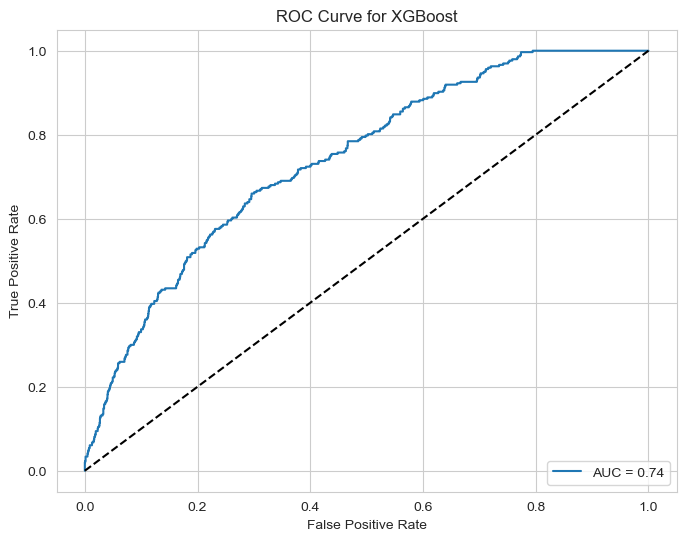

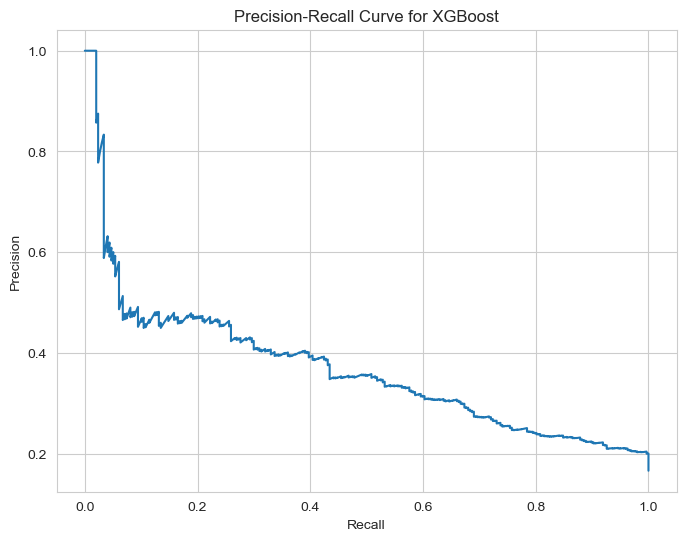

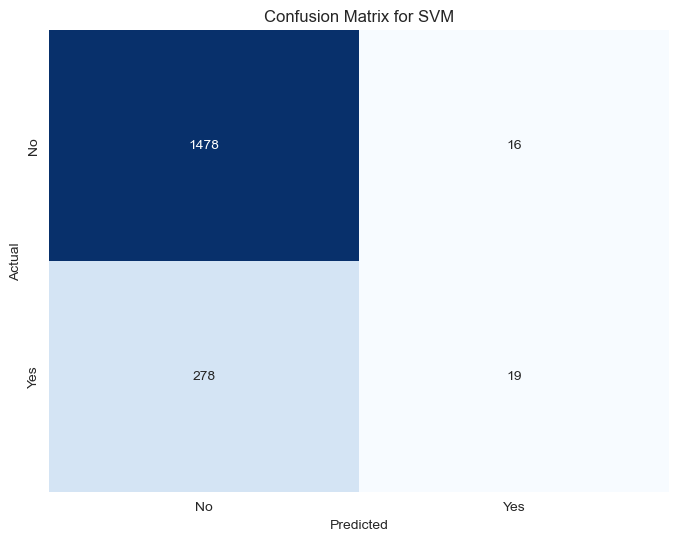

Classification Report for SVM:

              precision    recall  f1-score   support

          No       0.84      0.99      0.91      1494
         Yes       0.54      0.06      0.11       297

    accuracy                           0.84      1791
   macro avg       0.69      0.53      0.51      1791
weighted avg       0.79      0.84      0.78      1791



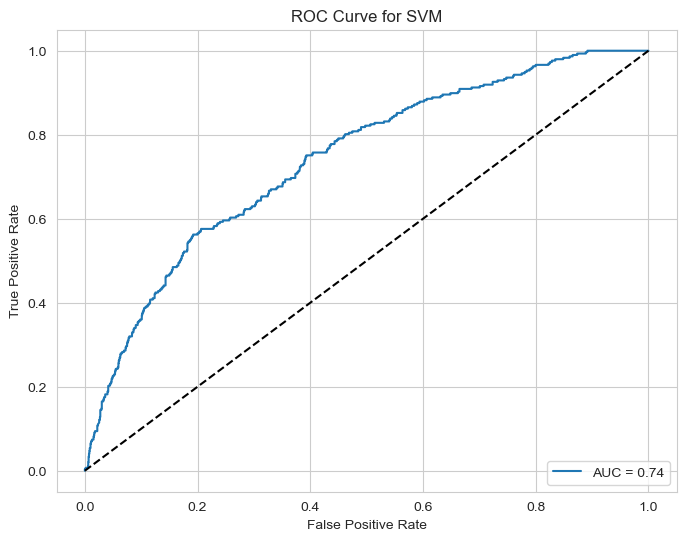

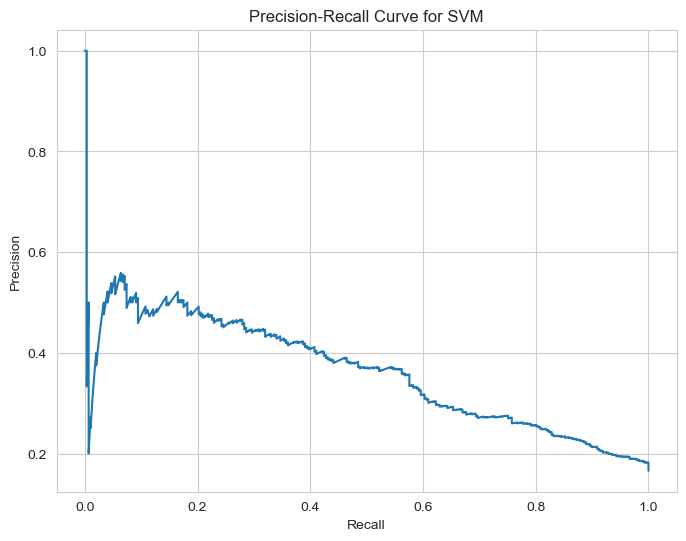

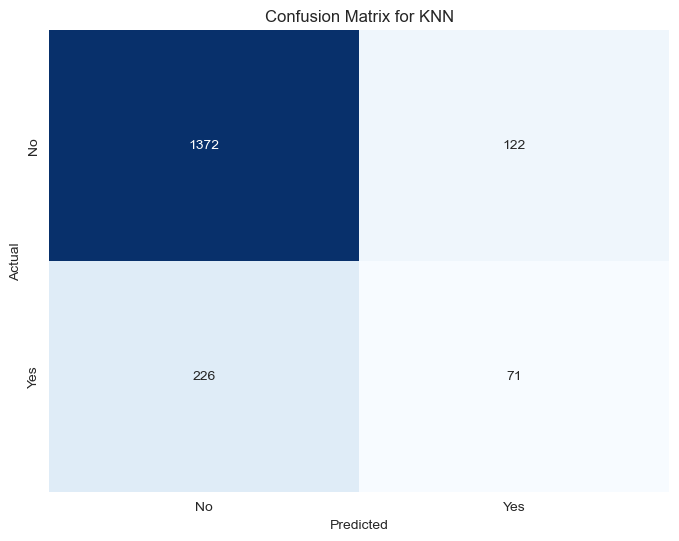

Classification Report for KNN:

              precision    recall  f1-score   support

          No       0.86      0.92      0.89      1494
         Yes       0.37      0.24      0.29       297

    accuracy                           0.81      1791
   macro avg       0.61      0.58      0.59      1791
weighted avg       0.78      0.81      0.79      1791



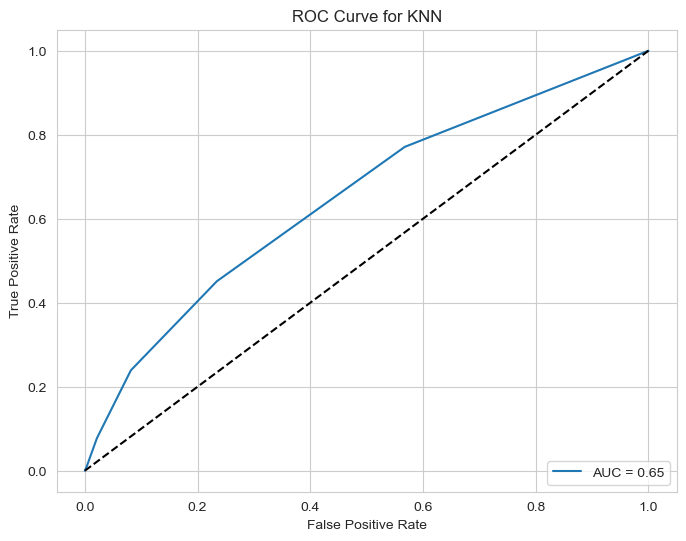

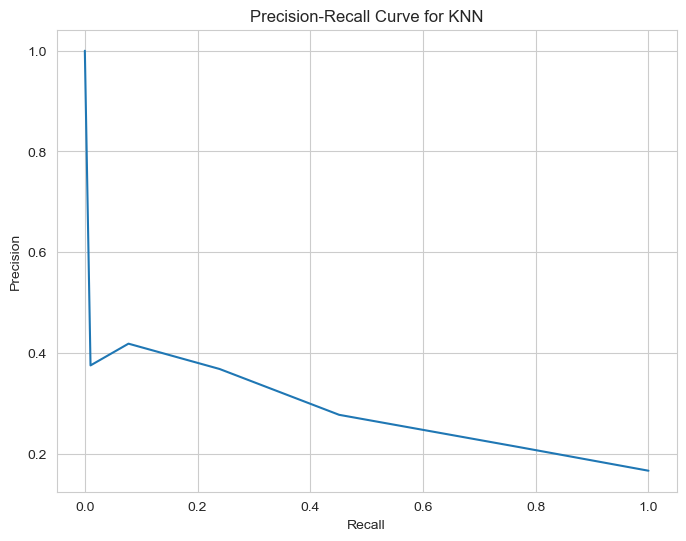

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve)

# Define the models and their respective predictions
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'KNN']
model_objects = [log_reg, rf, xgb, svm, knn]  # Replace with your trained models
y_preds = [y_pred_test_log_reg, y_pred_test_rf, y_pred_test_xgb, y_pred_test_svm, y_pred_test_knn]

for model_name, model, y_pred in zip(models, model_objects, y_preds):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=['No', 'Yes']))

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # For most models like RF, XGBoost, KNN
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)  # For SVM
    else:
        raise ValueError(f"{model_name} does not support probability predictions.")

    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='AUC = %.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.show()


# Hyperparameter Tuning for Random Forest

### **Using Randomised Search CV**

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False],  # Whether to use bootstrap samples
    'criterion': ['gini', 'entropy'],  # Quality of split
    'class_weight': ['balanced', 'balanced_subsample', None]  # Handle imbalanced classes
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid, 
                                   n_iter=100,  # Number of random combinations to try
                                   scoring='balanced_accuracy',  # Metric to optimize
                                   cv=5,  # 5-fold cross-validation
                                   verbose=2, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

print(f"Best parameters found: {best_params}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': False}


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_best_params = {
    'n_estimators': 300,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'bootstrap': True,
    'criterion': 'gini',
    'class_weight': 'balanced'
}

rf_random = RandomForestClassifier(**rf_best_params, random_state=42)

# Train the model with the training data
rf_random.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_rf_random = rf_random.predict(X_train)
y_pred_test_rf_random = rf_random.predict(X_test)

# Calculate metrics for training set
accuracy_train_rf_random = accuracy_score(y_train, y_pred_train_rf_random)
roc_auc_train_rf_random = roc_auc_score(y_train, rf_random.predict_proba(X_train)[:, 1])
f1_train_rf_random = f1_score(y_train, y_pred_train_rf_random)
recall_train_rf_random = recall_score(y_train, y_pred_train_rf_random)
precision_train_rf_random = precision_score(y_train, y_pred_train_rf_random)
balanced_accuracy_train_rf_random = balanced_accuracy_score(y_train, y_pred_train_rf_random)

# Calculate metrics for testing set
accuracy_test_rf_random = accuracy_score(y_test, y_pred_test_rf_random)
roc_auc_test_rf_random = roc_auc_score(y_test, rf_random.predict_proba(X_test)[:, 1])
f1_test_rf_random = f1_score(y_test, y_pred_test_rf_random)
recall_test_rf_random = recall_score(y_test, y_pred_test_rf_random)
precision_test_rf_random = precision_score(y_test, y_pred_test_rf_random)
balanced_accuracy_test_rf_random = balanced_accuracy_score(y_test, y_pred_test_rf_random)

# Store the results in a DataFrame for Random Forest
rf_random_results = pd.DataFrame({
    'Model': ['Random Forest (Randomized Search)'],
    'Accuracy (Train)': [round(accuracy_train_rf_random, 4)],
    'ROC AUC (Train)': [round(roc_auc_train_rf_random, 4)],
    'F1 Score (Train)': [round(f1_train_rf_random, 4)],
    'Recall Score (Train)': [round(recall_train_rf_random, 3)],
    'Precision Score (Train)': [round(precision_train_rf_random, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_rf_random, 4)],
    'Accuracy (Test)': [round(accuracy_test_rf_random, 4)],
    'ROC AUC (Test)': [round(roc_auc_test_rf_random, 4)],
    'F1 Score (Test)': [round(f1_test_rf_random, 4)],
    'Recall Score (Test)': [round(recall_test_rf_random, 3)],
    'Precision Score (Test)': [round(precision_test_rf_random, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_rf_random, 4)]
})

# Concatenate the Random Forest results with the existing results DataFrame
results = pd.concat([results, rf_random_results], ignore_index=True)

# Display the updated DataFrame
display(HTML(results.to_html()))


### **Using Grid Search CV**

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [400, 500],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [2, 4],  # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False],  # Whether to use bootstrap samples
    'criterion': ['gini', 'entropy'],  # Quality of split
    'class_weight': ['balanced', 'balanced_subsample', None]  # Handle imbalanced classes
}

# Initialize the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(estimator=rf, 
                              param_grid=param_grid, 
                              scoring='f1',  # Optimize for F1 score
                              cv=3,  # 3-fold cross-validation
                              verbose=2, 
                              n_jobs=-1)

# Fit the model with GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf_grid = grid_search_rf.best_params_
print(f"Best parameters found by GridSearchCV for Random Forest: {best_params_rf_grid}")

# Save the best parameters for later use
best_params_rf_grid

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


d:\Users\ramna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1296 fits failed out of a total of 3888.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1151 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Users\ramna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Users\ramna\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\Users\ramna\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Users\ramna\anaconda3\Lib\site-pac

Best parameters found by GridSearchCV for Random Forest: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}


{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [74]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import pandas as pd
from IPython.display import display, HTML

# Assuming `best_params_rf_grid` is already available from Part 1
# Initialize RandomForest with the best parameters
rf_grid = RandomForestClassifier(**best_params_rf_grid, random_state=42)

# Train the model with the training data
rf_grid.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_rf_grid = rf_grid.predict(X_train)
y_pred_test_rf_grid = rf_grid.predict(X_test)

# Calculate metrics for training set
accuracy_train_rf_grid = accuracy_score(y_train, y_pred_train_rf_grid)
roc_auc_train_rf_grid = roc_auc_score(y_train, rf_grid.predict_proba(X_train)[:, 1])
f1_train_rf_grid = f1_score(y_train, y_pred_train_rf_grid)
recall_train_rf_grid = recall_score(y_train, y_pred_train_rf_grid)
precision_train_rf_grid = precision_score(y_train, y_pred_train_rf_grid)
balanced_accuracy_train_rf_grid = balanced_accuracy_score(y_train, y_pred_train_rf_grid)

# Calculate metrics for testing set
accuracy_test_rf_grid = accuracy_score(y_test, y_pred_test_rf_grid)
roc_auc_test_rf_grid = roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:, 1])
f1_test_rf_grid = f1_score(y_test, y_pred_test_rf_grid)
recall_test_rf_grid = recall_score(y_test, y_pred_test_rf_grid)
precision_test_rf_grid = precision_score(y_test, y_pred_test_rf_grid)
balanced_accuracy_test_rf_grid = balanced_accuracy_score(y_test, y_pred_test_rf_grid)

# Store the results in a DataFrame for Random Forest Grid Search
rf_grid_results = pd.DataFrame({
    'Model': ['Random Forest (Grid Search)'],
    'Accuracy (Train)': [round(accuracy_train_rf_grid, 4)],
    'ROC AUC (Train)': [round(roc_auc_train_rf_grid, 4)],
    'F1 Score (Train)': [round(f1_train_rf_grid, 4)],
    'Recall Score (Train)': [round(recall_train_rf_grid, 3)],
    'Precision Score (Train)': [round(precision_train_rf_grid, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_rf_grid, 4)],
    'Accuracy (Test)': [round(accuracy_test_rf_grid, 4)],
    'ROC AUC (Test)': [round(roc_auc_test_rf_grid, 4)],
    'F1 Score (Test)': [round(f1_test_rf_grid, 4)],
    'Recall Score (Test)': [round(recall_test_rf_grid, 3)],
    'Precision Score (Test)': [round(precision_test_rf_grid, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_rf_grid, 4)]
})

# Concatenate the Random Forest Grid Search results with the existing results DataFrame
results = pd.concat([results, rf_grid_results], ignore_index=True)

# Display the updated DataFrame
display(HTML(results.to_html()))

# Hyperparameter Tuning for XGBoost 

## XG Boost Hyperparameter Tuning using Randomised Search CV

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10],
    'scale_pos_weight': [1, 3, 5]  # Adjust for class imbalance
}

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, 
                                   param_distributions=param_grid, 
                                   n_iter=100,  # Number of random combinations to try
                                   scoring='balanced_accuracy',  # Metric to optimize
                                   cv=5,  # 5-fold cross-validation
                                   verbose=1, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

print(f"Best parameters found: {best_params}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Users\ramna\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:30:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'subsample': 0.7, 'scale_pos_weight': 5, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import pandas as pd
from IPython.display import display, HTML

# Best parameters from RandomizedSearchCV
best_params_random = {
    'subsample': 0.7,
    'scale_pos_weight': 5,
    'reg_lambda': 10,
    'reg_alpha': 0,
    'n_estimators': 300,
    'min_child_weight': 3,
    'max_depth': 10,
    'learning_rate': 0.01,
    'gamma': 0.3,
    'colsample_bytree': 0.7
}

# Initialize the model with the best parameters from RandomizedSearchCV
xgb_random = XGBClassifier(**best_params_random, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model with the training data
xgb_random.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_xgb_random = xgb_random.predict(X_train)
y_pred_test_xgb_random = xgb_random.predict(X_test)

# Calculate metrics for training set
accuracy_train_xgb_random = accuracy_score(y_train, y_pred_train_xgb_random)
roc_auc_train_xgb_random = roc_auc_score(y_train, xgb_random.predict_proba(X_train)[:, 1])
f1_train_xgb_random = f1_score(y_train, y_pred_train_xgb_random)
recall_train_xgb_random = recall_score(y_train, y_pred_train_xgb_random)
precision_train_xgb_random = precision_score(y_train, y_pred_train_xgb_random)
balanced_accuracy_train_xgb_random = balanced_accuracy_score(y_train, y_pred_train_xgb_random)

# Calculate metrics for testing set
accuracy_test_xgb_random = accuracy_score(y_test, y_pred_test_xgb_random)
roc_auc_test_xgb_random = roc_auc_score(y_test, xgb_random.predict_proba(X_test)[:, 1])
f1_test_xgb_random = f1_score(y_test, y_pred_test_xgb_random)
recall_test_xgb_random = recall_score(y_test, y_pred_test_xgb_random)
precision_test_xgb_random = precision_score(y_test, y_pred_test_xgb_random)
balanced_accuracy_test_xgb_random = balanced_accuracy_score(y_test, y_pred_test_xgb_random)

# Store the results in a DataFrame with clear label for RandomizedSearchCV
xgb_random_results = pd.DataFrame({
    'Model': ['XGBoost (Randomized Search)'],
    'Accuracy (Train)': [round(accuracy_train_xgb_random, 4)],
    'ROC AUC (Train)': [round(roc_auc_train_xgb_random, 4)],
    'F1 Score (Train)': [round(f1_train_xgb_random, 4)],
    'Recall Score (Train)': [round(recall_train_xgb_random, 3)],
    'Precision Score (Train)': [round(precision_train_xgb_random, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_xgb_random, 4)],
    'Accuracy (Test)': [round(accuracy_test_xgb_random, 4)],
    'ROC AUC (Test)': [round(roc_auc_test_xgb_random, 4)],
    'F1 Score (Test)': [round(f1_test_xgb_random, 4)],
    'Recall Score (Test)': [round(recall_test_xgb_random, 3)],
    'Precision Score (Test)': [round(precision_test_xgb_random, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_xgb_random, 4)]
})

# Concatenate the results with the existing results DataFrame
results = pd.concat([results, xgb_random_results], ignore_index=True)

# Display the updated DataFrame
display(HTML(results.to_html()))


d:\Users\ramna\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## XG Boost Hyperparameter Tuning using Grid Search CV

In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [8, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0.1, 0.3],
    'min_child_weight': [3, 5],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [1, 10],
    'scale_pos_weight': [5]  # Adjust for class imbalance
}

# Initialize the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='f1',  # Optimize F1 score
                           cv=3,  # Cross-validation
                           verbose=2, 
                           n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_grid_search = grid_search.best_params_
print(f"Best parameters found by GridSearchCV: {best_params_grid_search}")


Fitting 3 folds for each of 768 candidates, totalling 2304 fits


d:\Users\ramna\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
d:\Users\ramna\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:41:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found by GridSearchCV: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 10, 'scale_pos_weight': 5, 'subsample': 0.7}


In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import pandas as pd
from IPython.display import display, HTML

# Best parameters found by GridSearchCV
best_params_grid = {
    'colsample_bytree': 0.7,
    'gamma': 0.3,
    'learning_rate': 0.01,
    'max_depth': 10,
    'min_child_weight': 3,
    'n_estimators': 500,
    'reg_alpha': 0,
    'reg_lambda': 10,
    'scale_pos_weight': 5,
    'subsample': 0.7
}

# Initialize the XGBoost model with GridSearchCV parameters
xgb_grid = XGBClassifier(**best_params_grid, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_grid.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train_xgb_grid = xgb_grid.predict(X_train)
y_pred_test_xgb_grid = xgb_grid.predict(X_test)

# Calculate metrics for training set
accuracy_train_xgb_grid = accuracy_score(y_train, y_pred_train_xgb_grid)
roc_auc_train_xgb_grid = roc_auc_score(y_train, xgb_grid.predict_proba(X_train)[:, 1])
f1_train_xgb_grid = f1_score(y_train, y_pred_train_xgb_grid)
recall_train_xgb_grid = recall_score(y_train, y_pred_train_xgb_grid)
precision_train_xgb_grid = precision_score(y_train, y_pred_train_xgb_grid)
balanced_accuracy_train_xgb_grid = balanced_accuracy_score(y_train, y_pred_train_xgb_grid)

# Calculate metrics for testing set
accuracy_test_xgb_grid = accuracy_score(y_test, y_pred_test_xgb_grid)
roc_auc_test_xgb_grid = roc_auc_score(y_test, xgb_grid.predict_proba(X_test)[:, 1])
f1_test_xgb_grid = f1_score(y_test, y_pred_test_xgb_grid)
recall_test_xgb_grid = recall_score(y_test, y_pred_test_xgb_grid)
precision_test_xgb_grid = precision_score(y_test, y_pred_test_xgb_grid)
balanced_accuracy_test_xgb_grid = balanced_accuracy_score(y_test, y_pred_test_xgb_grid)

# Store the results in a DataFrame
xgb_grid_results = pd.DataFrame({
    'Model': ['XGBoost (Grid Search)'],
    'Accuracy (Train)': [round(accuracy_train_xgb_grid, 4)],
    'ROC AUC (Train)': [round(roc_auc_train_xgb_grid, 4)],
    'F1 Score (Train)': [round(f1_train_xgb_grid, 4)],
    'Recall Score (Train)': [round(recall_train_xgb_grid, 3)],
    'Precision Score (Train)': [round(precision_train_xgb_grid, 3)],
    'Balanced Accuracy (Train)': [round(balanced_accuracy_train_xgb_grid, 4)],
    'Accuracy (Test)': [round(accuracy_test_xgb_grid, 4)],
    'ROC AUC (Test)': [round(roc_auc_test_xgb_grid, 4)],
    'F1 Score (Test)': [round(f1_test_xgb_grid, 4)],
    'Recall Score (Test)': [round(recall_test_xgb_grid, 3)],
    'Precision Score (Test)': [round(precision_test_xgb_grid, 3)],
    'Balanced Accuracy (Test)': [round(balanced_accuracy_test_xgb_grid, 4)]
})

# Concatenate the results with the existing results DataFrame
results = pd.concat([results, xgb_grid_results], ignore_index=True)

# Display the updated DataFrame
display(HTML(results.to_html(index=False)))


d:\Users\ramna\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:41:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


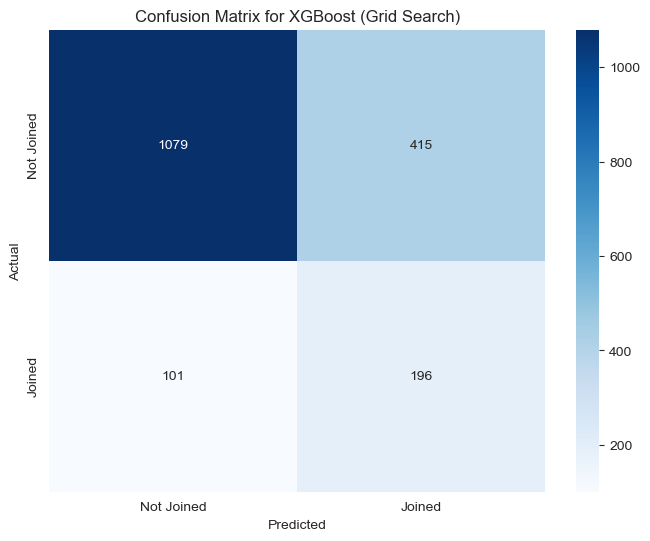

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_xgb_grid)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Joined', 'Joined'], 
            yticklabels=['Not Joined', 'Joined'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for XGBoost (Grid Search)')
plt.show()


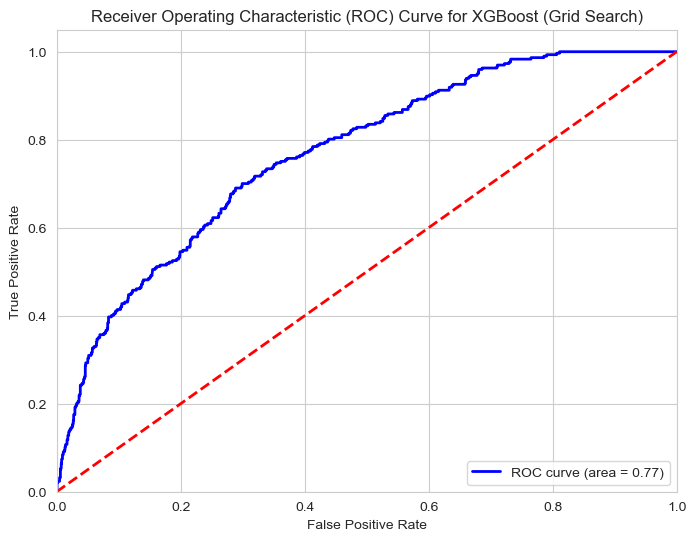

In [80]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_grid.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost (Grid Search)')
plt.legend(loc='lower right')
plt.show()


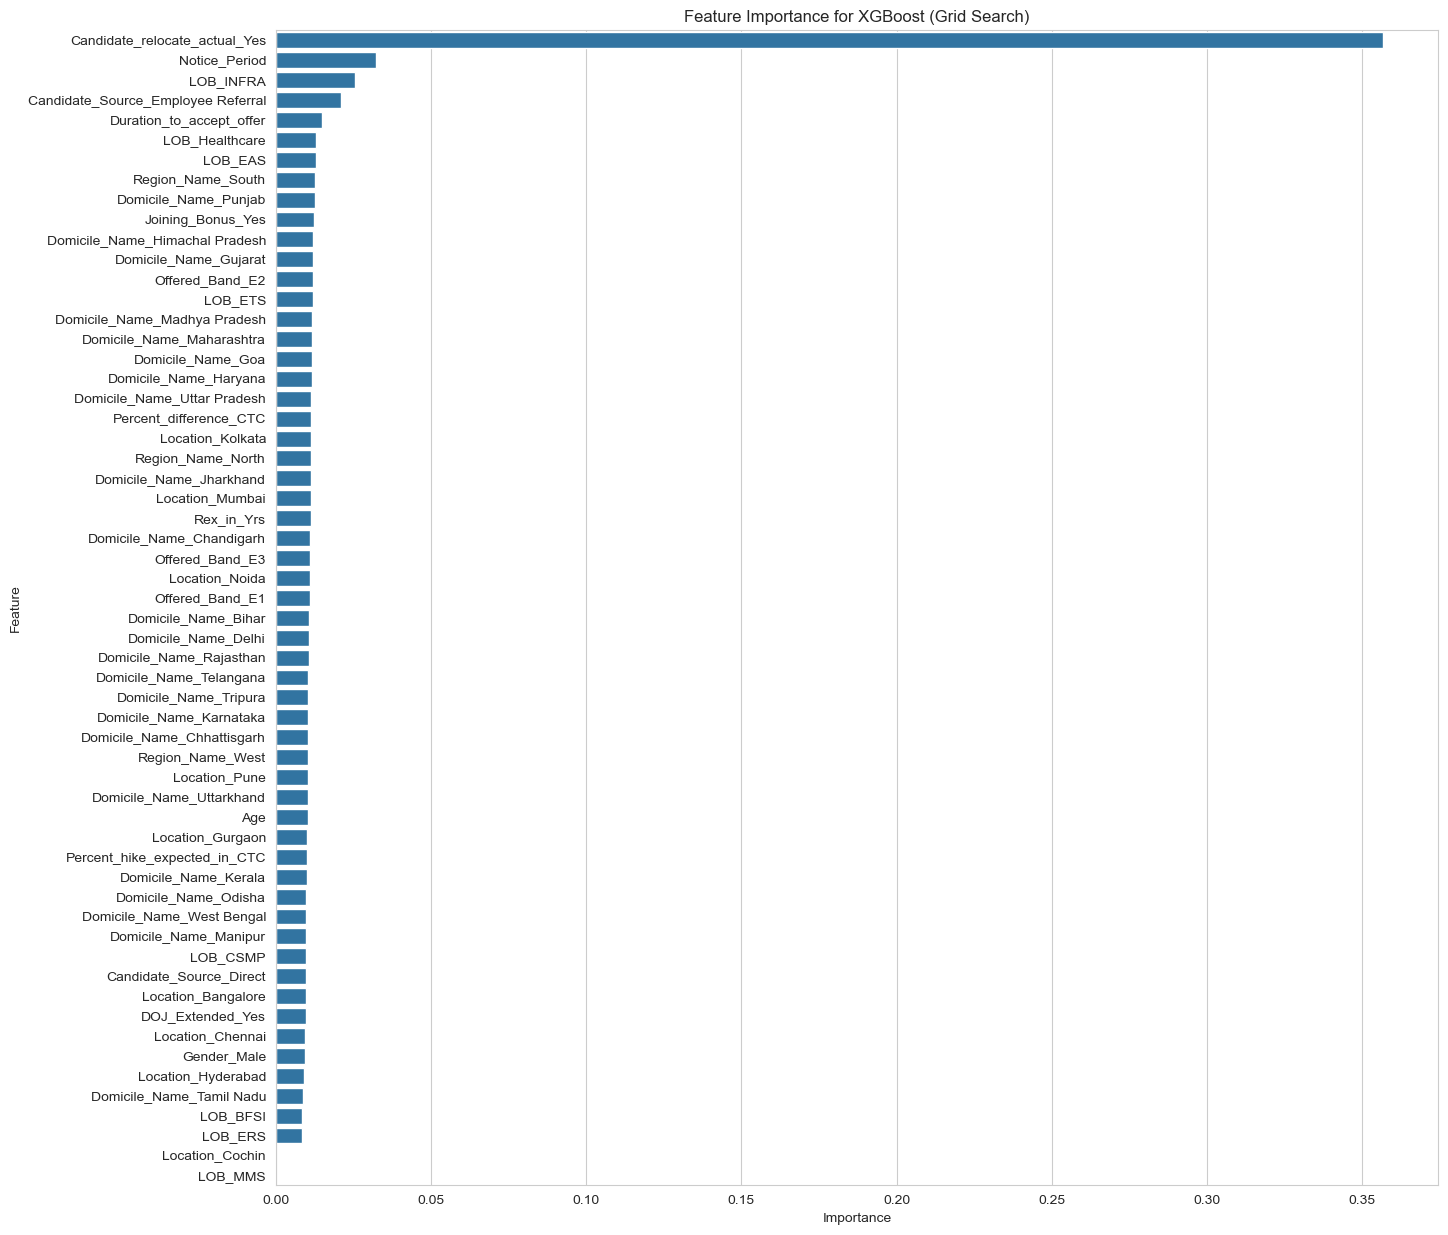

In [81]:
# Get feature importances
feature_importances = xgb_grid.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for XGBoost (Grid Search)')
plt.show()


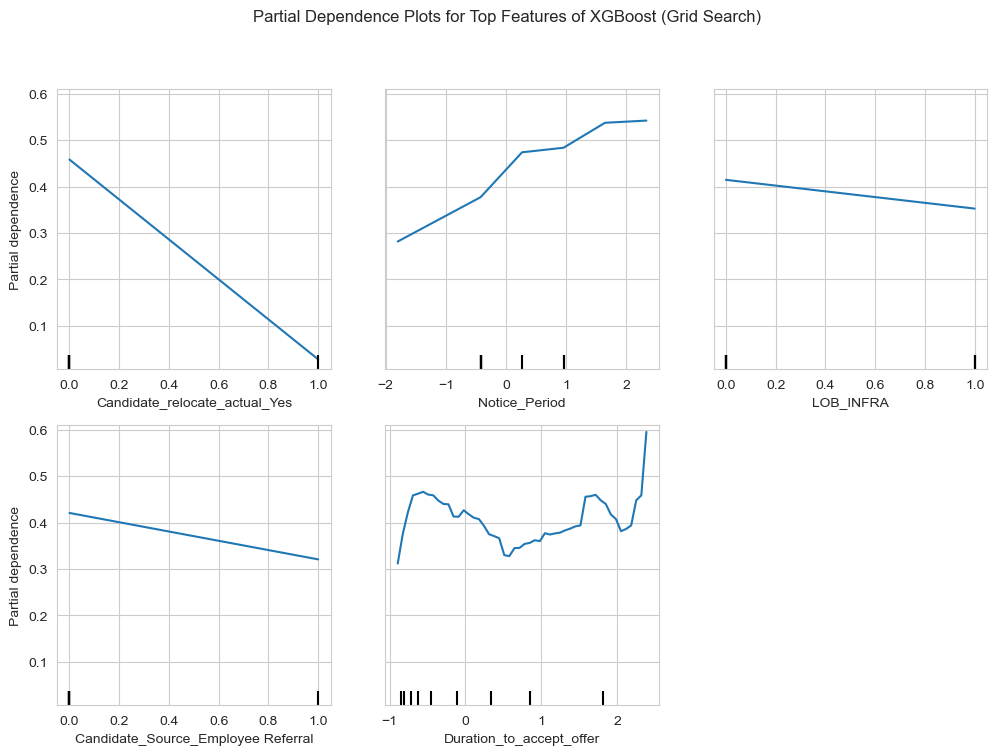

In [82]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for the top features
top_features = importance_df['Feature'].head(5).values
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    xgb_grid,
    X_train,
    features=top_features,
    ax=ax,
    grid_resolution=50
)
plt.suptitle('Partial Dependence Plots for Top Features of XGBoost (Grid Search)')
plt.show()


# Conclusion and Explanation of XGBoost Model Evaluation

## Overview
In this project, we focused on building and evaluating multiple machine learning models for a binary classification task. We experimented with various algorithms, including Logistic Regression, Random Forest, XGBoost, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The models were tuned using Grid Search and Randomized Search techniques to optimize performance. The evaluation metrics included accuracy, ROC AUC, F1 Score, Recall, Precision, and Balanced Accuracy.

## Model Performance Comparison
Here are the results of the models evaluated:

| Model                         | Accuracy (Train) | ROC AUC (Train) | F1 Score (Train) | Recall Score (Train) | Precision Score (Train) | Balanced Accuracy (Train) | Accuracy (Test) | ROC AUC (Test) | F1 Score (Test) | Recall Score (Test) | Precision Score (Test) | Balanced Accuracy (Test) |
|-------------------------------|------------------|------------------|-------------------|-----------------------|--------------------------|---------------------------|------------------|-----------------|-------------------|-----------------------|--------------------------|---------------------------|
| Logistic Regression           | 0.8127           | 0.7476           | 0.1496            | 0.085                 | 0.599                    | 0.5359                   | 0.8280           | 0.7404          | 0.0888            | 0.051                 | 0.366                    | 0.5166                    |
| Random Forest                 | 0.9986           | 1.0000           | 0.9964            | 0.996                 | 0.996                    | 0.9978                   | 0.8303           | 0.7437          | 0.2000            | 0.128                 | 0.458                    | 0.5489                    |
| XGBoost                       | 0.9541           | 0.9922           | 0.8672            | 0.778                 | 0.980                    | 0.8869                   | 0.8269           | 0.7406          | 0.3290            | 0.256                 | 0.461                    | 0.5982                    |
| Support Vector Machine        | 0.8248           | 0.9017           | 0.2062            | 0.118                 | 0.815                    | 0.5558                   | 0.8358           | 0.7407          | 0.1145            | 0.064                 | 0.543                    | 0.5266                    |
| K-Nearest Neighbors           | 0.8479           | 0.8658           | 0.4935            | 0.385                 | 0.689                    | 0.6715                   | 0.8057           | 0.6496          | 0.2898            | 0.239                 | 0.368                    | 0.5787                    |
| XGBoost (Randomized Search)   | 0.7856           | 0.9256           | 0.6272            | 0.936                 | 0.472                    | 0.8427                   | 0.6912           | 0.7676          | 0.4258            | 0.690                 | 0.308                    | 0.6908                    |
| XGBoost (Grid Search)        | 0.8298           | 0.9491           | 0.6840            | 0.955                 | 0.533                    | 0.8775                   | 0.7119           | 0.7677          | 0.4317            | 0.660                 | 0.321                    | 0.6911                    |

### Observations
- **Random Forest** achieved an impressive accuracy of **99.86%** on the training set and an AUC of **1.0000** but showed signs of overfitting, as its performance on the test set dropped significantly.
- **XGBoost** performed consistently well, especially with Grid Search, achieving a training accuracy of **82.98%** and a test accuracy of **71.19%**. This model demonstrated a good balance between precision and recall, especially in the training phase.
- **Logistic Regression** and **Support Vector Machine** had lower F1 scores and recall, indicating difficulties in capturing positive class predictions.
- **K-Nearest Neighbors** and **XGBoost (Randomized Search)** showed moderate performance, with KNN having a decent recall score but relatively low precision.

## Final Thoughts
The project highlighted the strengths and weaknesses of various machine learning models in tackling binary classification problems. While Random Forest demonstrated high accuracy, it may not generalize well to unseen data. XGBoost, particularly with hyperparameter tuning, proved to be a robust choice, achieving a good balance of performance metrics.

Future work should focus on exploring model ensembles, further feature engineering, and addressing any potential overfitting issues with Random Forest. Additionally, further investigation into hyperparameter tuning for models like SVM and KNN could yield improvements in their performance.


In [83]:
import joblib
from sklearn.preprocessing import StandardScaler

# Save the StandardScaler to a file
scaler_filename = 'models/scaler.pkl'
joblib.dump(scaler, scaler_filename)


['models/scaler.pkl']

In [84]:
import joblib
import xgboost as xgb

# Save the XGBoost model to a file
model_filename = 'models/xgb_tunedv3.pkl'
joblib.dump(xgb_grid, model_filename)


['models/xgb_tunedv3.pkl']

In [85]:
X_train.values[0, :]


array([-0.67400984, -1.79741903,  0.18414749,  0.12103541, -1.94653151,
        1.15327831,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])